#Imports

In [1]:
!pip install prophet
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd
import scipy.fft
import numpy as np
!pip install emd
import emd
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.utils as utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 8.4 MB/s eta 0:00:00


# Loading up data

In [246]:
# we have:
cols_to_use = ['CO2 Emissions (Mmt)', 'TotalNumberofInvestments', 'GETCB', 'HYTCB',
       'NCPRB', 'NUETB', 'REPRB', 'SOTCB', 'TEPRB', 'TETCB', 'WDEXB', 'WDPRB',
       'WDTCB', 'WSTCB', 'WWPRB', 'WYTCB']
# have the things done and call them:
input_train = pd.read_csv("2003-2019inputdata.csv").drop(['Year'], axis=1)
input_2020 = pd.read_excel("2020inputdata.xlsx").drop(['Year'], axis=1)
output_train = pd.read_csv("03-19_output.csv")
output_train = output_train.drop(output_train.columns[0], axis=1)
output_2020 = pd.read_csv("2020_output.csv")#.drop(['Year'], axis=1)
input_train.shape

(18, 1550)

In [4]:
input_train

,AK,AK.1,AK.2,AK.3,AK.4,AK.5,AK.6,AK.7,AK.8,AK.9,...,OR.30,SC.30,WY.30,AR.30,FL.30,MD.30,NH.30,CT.30,RI.30,WV.30
0,BDFDB,BDPRP,BFFDB,BFPRP,CLPRB,CLPRK,CLPRP,COPRK,EMFDB,ENPRP,...,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments,TotalNumberofInvestments
1,0,0,0,0,16864,15.6,1081,5.8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,23587,15.6,1512,5.8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,22682,15.6,1454,5.8,0,0,...,2,2,1,0,0,0,0,0,0,0
4,0,0,0,0,22230,15.6,1425,5.8,0,0,...,14,4,11,1,2,1,3,0,0,1
5,0,0,0,0,20654,15.6,1324,5.8,0,0,...,12,0,3,1,0,1,0,1,0,0
6,0,0,0,0,23041,15.6,1477,5.8,0,0,...,24,5,2,5,1,2,6,2,0,0
7,0,0,0,0,29016,15.6,1860,5.8,0,0,...,54,27,3,9,22,4,40,3,0,2
8,0,0,0,0,33556,15.6,2151,5.8,0,0,...,240,231,8,212,136,29,109,10,1,86
9,0,0,0,0,33524,15.6,2149,5.8,0,0,...,116,68,12,82,113,18,18,22,2,52


In [5]:
output_train

,AZ,CA,CO,DE,HI,ID,IL,IN,IA,KS,...,OR,SC,WY,AR,FL,MD,NH,WV,CT,RI
0,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,...,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance,TotalAmountofAssistance
1,3295000,191830,488500,135000,10073,730761,1586596,103790,2476609,785184,...,0,0,0,0,0,0,0,0,0,0
2,2079885,671988,425000,500000,1108548,250000,2060813,80000,530256,164568,...,0,0,0,0,0,0,0,0,0,0
3,0,849422,0,0,100000,417614,695373,200000,5415685,274372,...,182307,327821,35500,0,0,0,0,0,0,0
4,16000,339838,248681,80000,547881,305850,1007402,800000,15120942,507977,...,3629343,82735,273023,31537,517971,80000,478901,1731,0,0
5,10557,659998,476500,346000,16672,654500,1000999,2030938,14564003,372947,...,1746942,0,72262,98500,0,213110,0,0,29397,0
6,75839,2469385,936831,80000,1922497,1525832,1898243,473165,14767620,602044,...,1363977,68902,53733,208899,78658,36468,1020173,0,1350000,0
7,1529959,17065986,5181049,105816,443608,1510455,8491554,4205629,37838074,5647708,...,4276986,1221920,21789,1265142,53016188,135026,2493345,225000,636960,0
8,106306886,23018684,1507268,963525,116011905,2316468,8390296,7107849,39782988,4342230,...,6780676,14539154,50296,11161445,8827827,1120668,6391431,5019105,208323,189
9,4456560,35047470,2215177,975975,7472870,7460788,10457259,17476329,19754771,23729226,...,8321551,17456067,564568,4149820,97713464,1051425,776182,2337841,1063405,84693


In [6]:
for i in input_train.columns:
  print(i)

AK
AK.1
AK.2
AK.3
AK.4
AK.5
AK.6
AK.7
AK.8
AK.9
AK.10
AK.11
AK.12
AK.13
AK.14
AK.15
AK.16
AK.17
AK.18
AK.19
AK.20
AK.21
AK.22
AK.23
AK.24
AK.25
AK.26
AK.27
AK.28
AL
AL.1
AL.2
AL.3
AL.4
AL.5
AL.6
AL.7
AL.8
AL.9
AL.10
AL.11
AL.12
AL.13
AL.14
AL.15
AL.16
AL.17
AL.18
AL.19
AL.20
AL.21
AL.22
AL.23
AL.24
AL.25
AL.26
AL.27
AL.28
AR
AR.1
AR.2
AR.3
AR.4
AR.5
AR.6
AR.7
AR.8
AR.9
AR.10
AR.11
AR.12
AR.13
AR.14
AR.15
AR.16
AR.17
AR.18
AR.19
AR.20
AR.21
AR.22
AR.23
AR.24
AR.25
AR.26
AR.27
AR.28
AZ
AZ.1
AZ.2
AZ.3
AZ.4
AZ.5
AZ.6
AZ.7
AZ.8
AZ.9
AZ.10
AZ.11
AZ.12
AZ.13
AZ.14
AZ.15
AZ.16
AZ.17
AZ.18
AZ.19
AZ.20
AZ.21
AZ.22
AZ.23
AZ.24
AZ.25
AZ.26
AZ.27
AZ.28
CA
CA.1
CA.2
CA.3
CA.4
CA.5
CA.6
CA.7
CA.8
CA.9
CA.10
CA.11
CA.12
CA.13
CA.14
CA.15
CA.16
CA.17
CA.18
CA.19
CA.20
CA.21
CA.22
CA.23
CA.24
CA.25
CA.26
CA.27
CA.28
CO
CO.1
CO.2
CO.3
CO.4
CO.5
CO.6
CO.7
CO.8
CO.9
CO.10
CO.11
CO.12
CO.13
CO.14
CO.15
CO.16
CO.17
CO.18
CO.19
CO.20
CO.21
CO.22
CO.23
CO.24
CO.25
CO.26
CO.27
CO.28
CT
CT.1
CT.2
CT.3
CT.4
CT.5


In [199]:
output_train = output_train.drop(output_train.index[0])
output_train = output_train.reindex(sorted(output_train.columns), axis=1)
output_train = output_train.apply(pd.to_numeric, errors='coerce')

In [8]:

# create a function to extract the numerical portion of the column name
def extract_num(col):
    return int(col[3:]) if len(col)>2 else 0

# sort the columns alphabetically and by the numerical portion of the column name
input_train = input_train.reindex(sorted(input_train.columns), axis=1).apply(pd.to_numeric, errors='coerce')
input_train = input_train.drop([0], axis=0)
input_train.columns

Index(['AK', 'AK.1', 'AK.10', 'AK.11', 'AK.12', 'AK.13', 'AK.14', 'AK.15',
       'AK.16', 'AK.17',
       ...
       'WY.28', 'WY.29', 'WY.3', 'WY.30', 'WY.4', 'WY.5', 'WY.6', 'WY.7',
       'WY.8', 'WY.9'],
      dtype='object', length=1550)

In [200]:
output_train

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,0,0,0,3295000,191830,488500,0,135000,0,0,...,746000,225000,225000,74500,211650,12001,1052125,16584913,0,0
2,5973909,23688,0,2079885,671988,425000,0,500000,0,200060,...,0,0,16491,0,0,7417318,906543,12860160,0,0
3,2500000,0,0,0,849422,0,0,0,0,118150,...,0,210000,153298,0,0,0,598719,1521903,0,35500
4,6194311,1440534,31537,16000,339838,248681,0,80000,517971,15090,...,315140,54432,1974472,130856,0,1279160,440402,649682,1731,273023
5,38150000,0,98500,10557,659998,476500,29397,346000,0,18132216,...,546528,1550000,1725000,850000,595637,917643,399545,2169280,0,72262
6,1250000,942969,208899,75839,2469385,936831,1350000,80000,78658,738127,...,1393931,381827,378276,0,565500,5190769,3132340,5685506,0,53733
7,3642135,119752,1265142,1529959,17065986,5181049,636960,105816,53016188,82594226,...,1896252,1682593,1999483,12229,22305810,2344755,6732314,8814998,225000,21789
8,333654,28361109,11161445,106306886,23018684,1507268,208323,963525,8827827,24470159,...,3446993,6778217,11832502,139357,4476446,10678823,6504810,7530295,5019105,50296
9,1203885,4308464,4149820,4456560,35047470,2215177,1063405,975975,97713464,12992778,...,1939781,2233435,21912073,8074006,91571859,1297462,27943092,7488143,2337841,564568
10,1794897,1256535,9101573,7457132,26634635,1820771,913629,1058982,3033222,17319768,...,1677290,1795425,157634656,50056798,2368223,1393164,18158533,11055733,653551,182296


In [201]:
input_train.shape, output_train.shape

((18, 1550), (17, 50))

In [11]:
from collections import defaultdict as dd

def zero():
  return 0

emd_number = 2

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned


/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
 Inputs samples (17) is small for specified max_imfs (7) very likely that

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

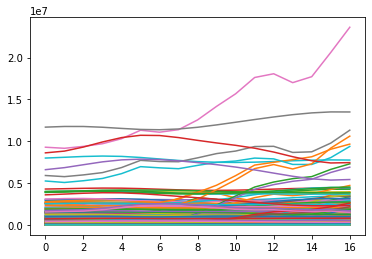

In [12]:
# emd the state statistics and toss it into nn
# we do it for input and output train
input_trends = dd(zero)

for col in input_train.columns:
  imf = emd.sift.mask_sift(input_train[col], max_imfs=7)
  trend = sum(imf.T[-1*emd_number:]) 
  plt.plot(range(17), trend)
  input_trends[col] = trend
  input_train[col] -= trend

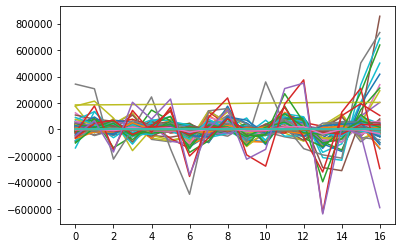

In [13]:
for col in input_train.columns:
  
  plt.plot(range(17), input_train[col])


AK
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
AL
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
AR
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
AZ
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
CA
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
CO
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
CT
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
DE
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
FL
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
GA
 Inputs samples (17) is small for specified

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

IN
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
KS
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
KY
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
LA
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
MA
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
MD
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
ME
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
MI
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
MN
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
MO
 Inputs samples (17) is small for specified

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

NE
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
NH
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
NJ
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
NM
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
NV
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
NY
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
OH
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
OK
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
OR
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
PA
 Inputs samples (17) is small for specified

/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

TX
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
UT
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
VA
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
VT
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
WA
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
WI
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
WV
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned
WY
 Inputs samples (17) is small for specified max_imfs (7) very likely that 3 or fewer imfs are returned


/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/emd/support.py:225: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) i

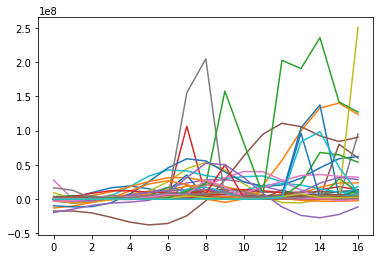

In [202]:
output_trends = dd(zero)

# subtract so that we can just test what's out of the model
for col in output_train.columns:
  print(col)
  imf = emd.sift.mask_sift(output_train[col], max_imfs=7)
  trend = sum(imf.T[-1*emd_number:])
  plt.plot(range(17), trend)
  output_trends[col] = trend
  output_train[col] -= trend

In [15]:
input_train

,AK,AK.1,AK.10,AK.11,AK.12,AK.13,AK.14,AK.15,AK.16,AK.17,...,WY.28,WY.29,WY.3,WY.30,WY.4,WY.5,WY.6,WY.7,WY.8,WY.9
1,0.0,0.0,0.0,2816.799484,1784.596117,36273.479315,0.018349,27381.603241,0.0,0.0,...,4.547474e-13,0.807668,0.0,2.220446e-16,-47893.058967,0.0,-2567.498655,0.0,0.000000e+00,0.0
2,0.0,0.0,0.0,1478.195491,397.146030,5316.864584,0.020584,-914.803483,0.0,0.0,...,0.000000e+00,0.318925,0.0,0.000000e+00,66943.309273,0.0,3238.865252,0.0,0.000000e+00,0.0
3,0.0,0.0,0.0,1543.984780,641.979610,15983.474448,-0.005100,16950.467354,0.0,0.0,...,0.000000e+00,-1.009844,0.0,4.440892e-16,-170947.063435,0.0,-9760.794179,0.0,0.000000e+00,0.0
4,0.0,0.0,0.0,-163.138257,-658.885807,-10254.645176,-0.009387,-6547.010701,0.0,0.0,...,9.094947e-13,-0.817201,0.0,0.000000e+00,205437.076417,0.0,12028.467005,0.0,0.000000e+00,0.0
5,0.0,0.0,0.0,927.743189,784.512783,12286.014569,0.004201,7749.704452,0.0,0.0,...,0.000000e+00,1.130498,0.0,0.000000e+00,76968.399919,0.0,4563.945382,0.0,0.000000e+00,0.0
6,0.0,0.0,0.0,-522.711348,-500.131826,-3618.074452,0.002294,-5234.930600,0.0,0.0,...,0.000000e+00,1.467800,0.0,0.000000e+00,229744.527033,0.0,13263.448601,0.0,0.000000e+00,0.0
7,0.0,0.0,0.0,139.305279,197.531108,8876.484660,-0.007618,9385.109660,0.0,0.0,...,0.000000e+00,-1.557413,0.0,4.440892e-16,-344024.169652,0.0,-20123.873412,0.0,0.000000e+00,0.0
8,0.0,0.0,0.0,486.282159,509.299801,-1774.261132,-0.006871,393.263785,0.0,0.0,...,0.000000e+00,-0.143802,0.0,0.000000e+00,6389.263531,0.0,481.186717,0.0,0.000000e+00,0.0
9,0.0,0.0,0.0,-874.878780,-961.587921,-1468.949753,0.010378,-3024.190258,0.0,0.0,...,0.000000e+00,-1.605888,0.0,0.000000e+00,146802.049467,0.0,9215.839906,0.0,0.000000e+00,0.0
10,0.0,0.0,0.0,858.034813,627.820687,5041.954909,0.008838,3673.293050,0.0,0.0,...,0.000000e+00,0.158273,0.0,0.000000e+00,-225540.490116,0.0,-13164.396302,0.0,0.000000e+00,0.0


In [204]:
output_trends = pd.DataFrame.from_dict(output_trends)

In [205]:
output_trends

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,-1.667976e+06,-1.289009e+07,-1.019786e+06,3295000.0,-1.017438e+06,488500.0,0.000000e+00,1.350000e+05,-2.971629e+06,-2.421206e+06,...,746000.0,-1.956887e+05,225000.0,74500.0,-1.951614e+07,3.000489e+06,1052125.0,16584913.0,1.164153e-10,-9.313226e-10
1,2.333870e+06,-1.014555e+07,-9.982099e+05,2079885.0,-2.313414e+06,425000.0,-2.910383e-11,5.000000e+05,-5.275929e+06,-5.558044e+06,...,0.0,5.925381e+02,16491.0,0.0,-1.461448e+07,3.530624e+06,906543.0,12860160.0,0.000000e+00,0.000000e+00
2,9.458910e+06,-4.953979e+06,-7.709816e+05,0.0,-2.342474e+06,0.0,-3.637979e-12,-4.656613e-10,-4.812076e+06,-3.863007e+06,...,0.0,1.870174e+05,153298.0,0.0,-9.174568e+06,2.283691e+06,598719.0,1521903.0,0.000000e+00,3.550000e+04
3,1.646182e+07,1.623850e+06,-2.344491e+05,16000.0,-6.318869e+05,248681.0,0.000000e+00,8.000000e+04,-9.311930e+05,4.314232e+06,...,315140.0,2.462571e+05,1974472.0,130856.0,-5.894800e+06,8.881975e+05,440402.0,649682.0,1.731000e+03,2.730230e+05
4,1.913829e+07,7.658509e+06,8.290212e+05,10557.0,3.275488e+06,476500.0,2.939700e+04,3.460000e+05,4.239985e+06,1.838231e+07,...,546528.0,5.023303e+05,1725000.0,850000.0,-4.313032e+06,1.284743e+06,399545.0,2169280.0,-5.820766e-11,7.226200e+04
5,1.516608e+07,1.136810e+07,2.394595e+06,75839.0,9.361949e+06,936831.0,1.350000e+06,8.000000e+04,1.168432e+07,3.351874e+07,...,1393931.0,1.413514e+06,378276.0,0.0,-1.735995e+06,3.455275e+06,3132340.0,5685506.0,0.000000e+00,5.373300e+04
6,8.209561e+06,1.147727e+07,4.389277e+06,1529959.0,1.667535e+07,5181049.0,6.369600e+05,1.058160e+05,2.518590e+07,4.261305e+07,...,1896252.0,2.852178e+06,1999483.0,12229.0,8.019218e+06,5.906461e+06,6732314.0,8814998.0,2.250000e+05,2.178900e+04
7,2.682299e+06,7.366034e+06,6.462027e+06,106306886.0,2.357428e+07,1507268.0,2.083230e+05,9.635250e+05,4.449582e+07,4.116630e+07,...,3446993.0,4.025088e+06,11832502.0,139357.0,3.157948e+07,6.500096e+06,6504810.0,7530295.0,5.019105e+06,5.029600e+04
8,5.891816e+05,6.718680e+04,7.837413e+06,4456560.0,2.801813e+07,2215177.0,1.063405e+06,9.759750e+05,5.359484e+07,3.433872e+07,...,1939781.0,4.216751e+06,21912073.0,8074006.0,5.232825e+07,4.160068e+06,27943092.0,7488143.0,2.337841e+06,5.645680e+05
9,1.105763e+06,-4.554478e+06,7.540599e+06,7457132.0,2.850950e+07,1820771.0,9.136290e+05,1.058982e+06,4.259304e+07,3.013922e+07,...,1677290.0,3.572170e+06,157634656.0,50056798.0,5.036109e+07,1.176571e+06,18158533.0,11055733.0,6.535510e+05,1.822960e+05


In [16]:
# convert these guys into training datapts
# reformat such that each state is 1 col
input_train =input_train.groupby(input_train.columns, axis=1).sum()
output_train =output_train.groupby(output_train.columns, axis=1).sum()

# remove the things and remember where they are

# here we assume that rows are years, columns are states, and that the data is formatted

# with datapt = state, year, the rest

input_train = input_train.to_numpy()
output_train = output_train.to_numpy()


In [102]:
# arrange them: state yr 0, alphabetical, yr 1, etc
input_train = np.reshape(input_train, (17*50, 31), order='C')
output_train = np.reshape(output_train, (17*50, 1), order='C')

input_train_2 = np.empty((850, 33))

# add state and year
for i in range(850):
  year = i//50
  state = i%50
  input_train_2[i] = np.hstack((input_train[i], np.array([year, state])))

input_train = input_train_2

input_train.shape, output_train.shape

((850, 33), (850, 1))

##Pytorch

In [141]:
X_train = torch.tensor(input_train).cuda()
Y_train = torch.tensor(output_train).cuda()
#X_test = torch.tensor(input_2020)
#Y_test = torch.tensor(output_2020)

train_dataset = TensorDataset(X_train, Y_train)
batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [108]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()

        self.lazylinear = nn.LazyLinear(out_features=1024)
        self.l1 = nn.LazyLinear(out_features=1024)
        self.l2 = nn.LazyLinear(out_features=1024)
        self.last = nn.Linear(in_features=1024, out_features=1)

    def forward(self, x):
        x = torch.selu(self.lazylinear(x))
        x = torch.selu(self.l1(x))
        x = torch.selu(self.l2(x))
        x = torch.relu(self.last(x))
        return x


In [136]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.lazylinear = nn.LazyLinear(out_features=1024)
        self.lazylinear2 = nn.LazyLinear(out_features=1024)
        self.lazylinear3 = nn.LazyLinear(out_features=1024)
        self.conv1 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        self.dense = nn.LazyLinear(out_features=2048)
        self.dense2 = nn.LazyLinear(out_features=2048)
        self.dense3 = nn.Linear(in_features=2048, out_features=1024)
        self.outputlayer = nn.Linear(in_features=1024, out_features=256)
        self.last = nn.Linear(in_features=256, out_features=1)

    def forward(self, x):
        x = self.lazylinear(x)
        x = torch.relu(self.lazylinear2(x))
        x = torch.selu(self.lazylinear3(x))
        #print(x.shape)
        x = torch.reshape(x, (-1, 16, 1024//16))
        #print("after reshape", x.shape)
        x = torch.sigmoid(self.conv1(x))
        x2 = x.clone()
        x = torch.sigmoid(self.conv2(x) + x2)
        x = torch.sigmoid(self.conv3(x))
        x = x.flatten(1)
        x = torch.sigmoid(self.dense(x))
        x = torch.sigmoid(self.dense2(x))
        x = torch.sigmoid(self.dense3(x))
        x = torch.sigmoid(self.outputlayer(x))
        x = self.last(x)
        return x


In [142]:
# Define your model
model = MyModel().double().cuda()

class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, predictions, targets):
        mse_loss = self.mse(predictions, targets)
        rmse_loss = torch.sqrt(mse_loss)
        return rmse_loss


In [143]:
# Define a loss function and optimizer
criterion = RMSELoss()
optimizer = torch.optim.Adam(lr=1e-20, params=model.parameters())

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    for i, (X_batch, y_batch) in enumerate(train_loader):
        # Forward pass
        output = model(X_batch)
        
        # Compute loss
        loss = criterion(output, y_batch)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Backward pass and optimize
        loss.backward()
        #utils.clip_grad_norm_(model.parameters(), 1e-60)
        optimizer.step()
        
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch 1/20, Loss: 0.2649
Epoch 2/20, Loss: 17760004.0021
Epoch 3/20, Loss: 0.2649
Epoch 4/20, Loss: 895376.0335
Epoch 5/20, Loss: 0.2649
Epoch 6/20, Loss: 0.2649
Epoch 7/20, Loss: 0.2649
Epoch 8/20, Loss: 287606.2593
Epoch 9/20, Loss: 1031687.3901
Epoch 10/20, Loss: 3886693.2512
Epoch 11/20, Loss: 0.2649


KeyboardInterrupt: ignored

In [ ]:
#np.sqrt(sum(np.abs(model.cpu()(X_test.cpu()).detach().numpy()[0]-Y_test)**2)/50)

In [133]:
# calculate error on training data BEFORE ADDING TREND
np.sqrt(sum(np.abs(model.cpu()(X_train.cpu()).detach().numpy()[0]-Y_train.cpu().numpy())**2)/50)

array([69525765.54625426])

In [88]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

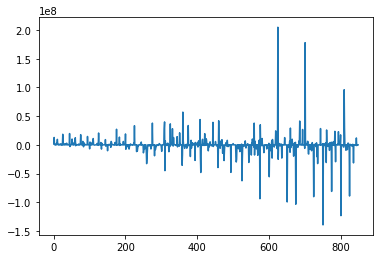

In [153]:
plt.plot(range(850), Y_train.cpu().numpy())

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


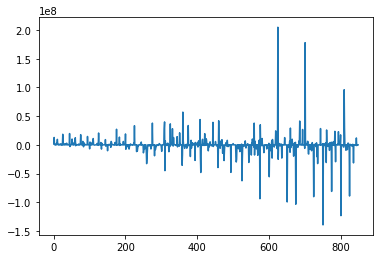

In [247]:
plt.plot(range(850), scipy.fft.fft(Y_train.cpu().numpy()))

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


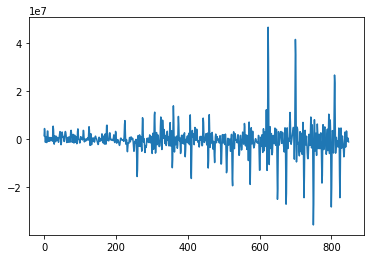

In [158]:
Y_fft = Y_train.cpu().numpy().T[0]
lowfourier = np.concatenate((scipy.fft.fft(Y_fft)[:len(Y_fft)//4], [0]*(3*len(Y_fft)//4)))
lowfourier = np.fft.ifft(lowfourier)
plt.plot(range(len(lowfourier)), lowfourier)

##RF


In [91]:
rf = RandomForestRegressor(n_estimators=3000)
rf.fit(X_train.cpu().numpy(), Y_train.cpu().numpy())

#print(rmse(rf.predict(test_X), test_y))
print(rmse(rf.predict(X_train.cpu().numpy()), Y_train.cpu().numpy()))

<ipython-input-91-5e986fc6f76d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train.cpu().numpy(), Y_train.cpu().numpy())


20219287.85087512


##Inference

In [ ]:
# now we do inference

# first we subtract the prediction from input_2020 and output_2020 unformatted
# prophet predict next value of input and output trend
# input_2020 subtract the input pred --> model
# output of model add back the output pred --> rmse

In [188]:
input_2020 = input_2020.drop(input_2020.index[0])
input_2020 = input_2020.reindex(sorted(input_2020.columns), axis=1)
input_2020 = input_2020.apply(pd.to_numeric, errors='coerce')

In [229]:
output_2020 = output_2020.drop(output_2020.index[0])
output_2020 = output_2020.drop(output_2020.columns[0], axis=1)
output_2020 = output_2020.reindex(sorted(output_2020.columns), axis=1)
output_2020 = output_2020.apply(pd.to_numeric, errors='coerce')

In [181]:
input_2020

,AK,AK.1,AK.10,AK.11,AK.12,AK.13,AK.14,AK.15,AK.16,AK.17,...,WY.28,WY.29,WY.3,WY.30,WY.4,WY.5,WY.6,WY.7,WY.8,WY.9
1,0,0,186,15475,16851,376283,1.112,338329,0,932482,...,48362,55.621183,0,11,3822600,17.49,218556,5.691,0,0


In [230]:
output_2020

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,9567164,1174323,61208016,23756565,58722209,6304206,491729,23750266,8467648,7307409,...,6976448,1536871,39546994,736194,2039514,2405926,2509973,9860324,1052654,229763


In [194]:
# arrange them: state yr 0, alphabetical, yr 1, etc
#input_2020 = np.reshape(input_2020.to_numpy(), (1*50, 31), order='C')
output_2020 = np.reshape(output_2020.to_numpy(), (1*50, 1), order='C')

In [195]:
### IGNORE

input_2020_2 = np.empty((50, 33))

# add state and year
for i in range(50):
  year = i//50
  state = i%50
  input_2020_2[i] = np.hstack((input_2020[i], np.array([year, state])))

input_2020 = input_2020_2

input_2020.shape, output_2020.shape

KeyError: ignored

In [178]:
# prophet on input trends
input_prophecy_minus = [input_2020.shape[1]]

for i in range(input_2020.shape[1]):
  # rename the cols to ds and y


  # create a prophet model
  model = Prophet(interval_width=0.7)#, yearly_seasonality=0)

  print(input_trends[i])
  # fit the model to the data
  model.fit(input_trends[i])

  # create a dataframe to hold the predictions
  future = model.make_future_dataframe(periods=1, freq='Y')
  future.tail()

  # make predictions
  predictions = model.predict(future)

  # view the predictions for the year 2022
  print("pred:", predictions[['ds', 'yhat']])#.dt.year == 2022)

  # save it
  input_prophecy_minus[i] = predictions[['yhat']].to_numpy().T[0]

0


TypeError: ignored

In [197]:
output_2020

array([[  9567164],
       [  1174323],
       [ 61208016],
       [ 23756565],
       [ 58722209],
       [  6304206],
       [   491729],
       [ 23750266],
       [  8467648],
       [  7307409],
       [  1153848],
       [ 63476066],
       [   733911],
       [  3526853],
       [  8555854],
       [  2802130],
       [ 11046095],
       [  5171076],
       [ 21021782],
       [  1459180],
       [  1718854],
       [  3543100],
       [ 29357835],
       [  4677028],
       [  2102663],
       [   542585],
       [176369306],
       [   686913],
       [  9134015],
       [   996776],
       [   428543],
       [ 48503359],
       [    53672],
       [ 39346669],
       [  3038155],
       [   560909],
       [ 25808865],
       [  2136747],
       [   635939],
       [145497267],
       [  6976448],
       [  1536871],
       [ 39546994],
       [   736194],
       [  2039514],
       [  2405926],
       [  2509973],
       [  9860324],
       [  1052654],
       [   229763]])

In [196]:
# prophet on output trends
output_prophecy_add = [output_2020.shape[1]]

for i in range(output_2020.shape[1]):
  # rename the cols to ds and y


  # create a prophet model
  model = Prophet(interval_width=0.7)#, yearly_seasonality=0)

  print(output_trends[i])
  # fit the model to the data
  model.fit(output_trends[i])

  # create a dataframe to hold the predictions
  future = model.make_future_dataframe(periods=1, freq='Y')
  future.tail()

  # make predictions
  predictions = model.predict(future)

  # view the predictions for the year 2022
  print("pred:", predictions[['ds', 'yhat']])#.dt.year == 2022)

  # save it
  output_prophecy_add[i] = predictions[['yhat']].to_numpy().T[0]

0


TypeError: ignored

In [ ]:
# to run inference
# reshape input_2020 and output_2020
# assume reshaped 1 by 50 by whatever
input_2020 -= input_prophecy_minus
inference_results = model(input_2020) + output_prophecy_add

print(rmse(inference_results, output_2020))

##Prophet on output

In [225]:
output_trends

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,-1.667976e+06,-1.289009e+07,-1.019786e+06,3295000.0,-1.017438e+06,488500.0,0.000000e+00,1.350000e+05,-2.971629e+06,-2.421206e+06,...,746000.0,-1.956887e+05,225000.0,74500.0,-1.951614e+07,3.000489e+06,1052125.0,16584913.0,1.164153e-10,-9.313226e-10
1,2.333870e+06,-1.014555e+07,-9.982099e+05,2079885.0,-2.313414e+06,425000.0,-2.910383e-11,5.000000e+05,-5.275929e+06,-5.558044e+06,...,0.0,5.925381e+02,16491.0,0.0,-1.461448e+07,3.530624e+06,906543.0,12860160.0,0.000000e+00,0.000000e+00
2,9.458910e+06,-4.953979e+06,-7.709816e+05,0.0,-2.342474e+06,0.0,-3.637979e-12,-4.656613e-10,-4.812076e+06,-3.863007e+06,...,0.0,1.870174e+05,153298.0,0.0,-9.174568e+06,2.283691e+06,598719.0,1521903.0,0.000000e+00,3.550000e+04
3,1.646182e+07,1.623850e+06,-2.344491e+05,16000.0,-6.318869e+05,248681.0,0.000000e+00,8.000000e+04,-9.311930e+05,4.314232e+06,...,315140.0,2.462571e+05,1974472.0,130856.0,-5.894800e+06,8.881975e+05,440402.0,649682.0,1.731000e+03,2.730230e+05
4,1.913829e+07,7.658509e+06,8.290212e+05,10557.0,3.275488e+06,476500.0,2.939700e+04,3.460000e+05,4.239985e+06,1.838231e+07,...,546528.0,5.023303e+05,1725000.0,850000.0,-4.313032e+06,1.284743e+06,399545.0,2169280.0,-5.820766e-11,7.226200e+04
5,1.516608e+07,1.136810e+07,2.394595e+06,75839.0,9.361949e+06,936831.0,1.350000e+06,8.000000e+04,1.168432e+07,3.351874e+07,...,1393931.0,1.413514e+06,378276.0,0.0,-1.735995e+06,3.455275e+06,3132340.0,5685506.0,0.000000e+00,5.373300e+04
6,8.209561e+06,1.147727e+07,4.389277e+06,1529959.0,1.667535e+07,5181049.0,6.369600e+05,1.058160e+05,2.518590e+07,4.261305e+07,...,1896252.0,2.852178e+06,1999483.0,12229.0,8.019218e+06,5.906461e+06,6732314.0,8814998.0,2.250000e+05,2.178900e+04
7,2.682299e+06,7.366034e+06,6.462027e+06,106306886.0,2.357428e+07,1507268.0,2.083230e+05,9.635250e+05,4.449582e+07,4.116630e+07,...,3446993.0,4.025088e+06,11832502.0,139357.0,3.157948e+07,6.500096e+06,6504810.0,7530295.0,5.019105e+06,5.029600e+04
8,5.891816e+05,6.718680e+04,7.837413e+06,4456560.0,2.801813e+07,2215177.0,1.063405e+06,9.759750e+05,5.359484e+07,3.433872e+07,...,1939781.0,4.216751e+06,21912073.0,8074006.0,5.232825e+07,4.160068e+06,27943092.0,7488143.0,2.337841e+06,5.645680e+05
9,1.105763e+06,-4.554478e+06,7.540599e+06,7457132.0,2.850950e+07,1820771.0,9.136290e+05,1.058982e+06,4.259304e+07,3.013922e+07,...,1677290.0,3.572170e+06,157634656.0,50056798.0,5.036109e+07,1.176571e+06,18158533.0,11055733.0,6.535510e+05,1.822960e+05


In [226]:
state_preds = dd(zero)

# have 50 states, need to get a dataframe for every state with y and ds
for col in output_trends.columns:
  # make a dataframe
  df = pd.DataFrame({'ds': range(2003, 2020), 'y': output_trends[col]})
  df['ds'] = pd.to_datetime(df['ds'], format='%Y')
  # create a prophet model
  model = Prophet(interval_width=0.7)#, yearly_seasonality=0)

  print(df)
  # fit the model to the data
  model.fit(df)

  # create a dataframe to hold the predictions
  future = model.make_future_dataframe(periods=1, freq='Y')
  future.tail()

  # make predictions
  predictions = model.predict(future)

  # view the predictions for the year 2022
  print("pred:", predictions[['ds', 'yhat']])#.dt.year == 2022)

  # save it
  state_preds[col] = predictions[['yhat']].to_numpy().T[0]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/lvtxv2pg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/3qiyhu22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44718', 'data', 'file=/tmp/tmp0kys6ys2/lvtxv2pg.json', 'init=/tmp/tmp0kys6ys2/3qiyhu22.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model6ws2dzp3/prophet_model-20230129135937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds             y
0  2003-01-01 -1.667976e+06
1  2004-01-01  2.333870e+06
2  2005-01-01  9.458910e+06
3  2006-01-01  1.646182e+07
4  2007-01-01  1.913829e+07
5  2008-01-01  1.516608e+07
6  2009-01-01  8.209561e+06
7  2010-01-01  2.682299e+06
8  2011-01-01  5.891816e+05
9  2012-01-01  1.105763e+06
10 2013-01-01  2.098905e+06
11 2014-01-01  2.298470e+06
12 2015-01-01  2.342527e+06
13 2016-01-01  3.600619e+06
14 2017-01-01  6.921701e+06
15 2018-01-01  1.117040e+07
16 2019-01-01  1.319454e+07


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/9h9id_f5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/w6_ewnfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28456', 'data', 'file=/tmp/tmp0kys6ys2/9h9id_f5.json', 'init=/tmp/tmp0kys6ys2/w6_ewnfs.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model0o273xsw/prophet_model-20230129135938.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


pred:            ds          yhat
0  2003-01-01  6.946296e+06
1  2004-01-01  6.390092e+06
2  2005-01-01  7.780681e+06
3  2006-01-01  7.282347e+06
4  2007-01-01  6.754786e+06
5  2008-01-01  6.198581e+06
6  2009-01-01  7.589170e+06
7  2010-01-01  7.090837e+06
8  2011-01-01  6.563275e+06
9  2012-01-01  6.007070e+06
10 2013-01-01  7.397659e+06
11 2014-01-01  6.899326e+06
12 2015-01-01  6.371764e+06
13 2016-01-01  5.815560e+06
14 2017-01-01  7.206149e+06
15 2018-01-01  6.707815e+06
16 2019-01-01  6.180254e+06
17 2019-12-31  3.317660e+06
           ds             y
0  2003-01-01 -1.289009e+07
1  2004-01-01 -1.014555e+07
2  2005-01-01 -4.953979e+06
3  2006-01-01  1.623850e+06
4  2007-01-01  7.658509e+06
5  2008-01-01  1.136810e+07
6  2009-01-01  1.147727e+07
7  2010-01-01  7.366034e+06
8  2011-01-01  6.718680e+04
9  2012-01-01 -4.554478e+06
10 2013-01-01  3.565977e+05
11 2014-01-01  2.041478e+07
12 2015-01-01  5.642780e+07
13 2016-01-01  9.958952e+07
14 2017-01-01  1.328757e+08
15 2018-01-01 

13:59:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/md_gphq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/9dbrqro_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17571', 'data', 'file=/tmp/tmp0kys6ys2/md_gphq_.json', 'init=/tmp/tmp0kys6ys2/9dbrqro_.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model6h8ybq20/prophet_model-20230129135938.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -3.760521e+07
1  2004-01-01 -2.904779e+07
2  2005-01-01 -1.889774e+07
3  2006-01-01 -1.036510e+07
4  2007-01-01 -1.820311e+06
5  2008-01-01  6.737111e+06
6  2009-01-01  1.688716e+07
7  2010-01-01  2.541980e+07
8  2011-01-01  3.396459e+07
9  2012-01-01  4.252201e+07
10 2013-01-01  5.267350e+07
11 2014-01-01  6.120756e+07
12 2015-01-01  6.975378e+07
13 2016-01-01  7.831263e+07
14 2017-01-01  8.846411e+07
15 2018-01-01  9.699817e+07
16 2019-01-01  1.055444e+08
17 2019-12-31  1.126835e+08
           ds             y
0  2003-01-01 -1.019786e+06
1  2004-01-01 -9.982099e+05
2  2005-01-01 -7.709816e+05
3  2006-01-01 -2.344491e+05
4  2007-01-01  8.290212e+05
5  2008-01-01  2.394595e+06
6  2009-01-01  4.389277e+06
7  2010-01-01  6.462027e+06
8  2011-01-01  7.837413e+06
9  2012-01-01  7.540599e+06
10 2013-01-01  5.951014e+06
11 2014-01-01  4.954554e+06
12 2015-01-01  5.333080e+06
13 2016-01-01  6.087510e+06
14 2017-01-01  6.697060e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/cq2qrxwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/px09sawb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13079', 'data', 'file=/tmp/tmp0kys6ys2/cq2qrxwk.json', 'init=/tmp/tmp0kys6ys2/px09sawb.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modellm9egfaq/prophet_model-20230129135939.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:39 - cmdstanpy - INFO - Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -2.339249e+05
1  2004-01-01  3.632195e+05
2  2005-01-01  7.372628e+05
3  2006-01-01  1.314675e+06
4  2007-01-01  1.901986e+06
5  2008-01-01  2.499130e+06
6  2009-01-01  2.873173e+06
7  2010-01-01  3.450586e+06
8  2011-01-01  4.037896e+06
9  2012-01-01  4.635041e+06
10 2013-01-01  5.009084e+06
11 2014-01-01  5.586496e+06
12 2015-01-01  6.173807e+06
13 2016-01-01  6.770951e+06
14 2017-01-01  7.144995e+06
15 2018-01-01  7.722407e+06
16 2019-01-01  8.309717e+06
17 2019-12-31  9.255975e+06
           ds            y
0  2003-01-01    3295000.0
1  2004-01-01    2079885.0
2  2005-01-01          0.0
3  2006-01-01      16000.0
4  2007-01-01      10557.0
5  2008-01-01      75839.0
6  2009-01-01    1529959.0
7  2010-01-01  106306886.0
8  2011-01-01    4456560.0
9  2012-01-01    7457132.0
10 2013-01-01     467795.0
11 2014-01-01    1032775.0
12 2015-01-01    3345612.0
13 2016-01-01    2247734.0
14 2017-01-01   13509662.0
15 2018-01-01   18236626.0
16 

INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/tj4hewnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/1hnqhu9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7972', 'data', 'file=/tmp/tmp0kys6ys2/tj4hewnc.json', 'init=/tmp/tmp0kys6ys2/1hnqhu9y.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model2j_bs5ao/prophet_model-20230129135940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  5.782868e+06
1  2004-01-01  3.018536e+06
2  2005-01-01  1.190120e+07
3  2006-01-01  9.914074e+06
4  2007-01-01  7.536602e+06
5  2008-01-01  4.772270e+06
6  2009-01-01  1.365493e+07
7  2010-01-01  1.166781e+07
8  2011-01-01  9.290336e+06
9  2012-01-01  6.526004e+06
10 2013-01-01  1.540867e+07
11 2014-01-01  1.342154e+07
12 2015-01-01  1.104407e+07
13 2016-01-01  8.279738e+06
14 2017-01-01  1.716240e+07
15 2018-01-01  1.517528e+07
16 2019-01-01  1.279780e+07
17 2019-12-31 -6.553013e+06
           ds             y
0  2003-01-01 -1.017438e+06
1  2004-01-01 -2.313414e+06
2  2005-01-01 -2.342474e+06
3  2006-01-01 -6.318869e+05
4  2007-01-01  3.275488e+06
5  2008-01-01  9.361949e+06
6  2009-01-01  1.667535e+07
7  2010-01-01  2.357428e+07
8  2011-01-01  2.801813e+07
9  2012-01-01  2.850950e+07
10 2013-01-01  2.511214e+07
11 2014-01-01  1.895494e+07
12 2015-01-01  1.205373e+07
13 2016-01-01  5.695771e+06
14 2017-01-01  1.096756e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/7fpmju58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/30t9iol0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37683', 'data', 'file=/tmp/tmp0kys6ys2/7fpmju58.json', 'init=/tmp/tmp0kys6ys2/30t9iol0.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelk_la4rd2/prophet_model-20230129135940.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  6.448595e+06
1  2004-01-01  6.928142e+06
2  2005-01-01  7.226272e+06
3  2006-01-01  7.690012e+06
4  2007-01-01  8.161681e+06
5  2008-01-01  8.641228e+06
6  2009-01-01  8.939358e+06
7  2010-01-01  9.403098e+06
8  2011-01-01  9.874766e+06
9  2012-01-01  1.035431e+07
10 2013-01-01  1.065244e+07
11 2014-01-01  1.111618e+07
12 2015-01-01  1.158785e+07
13 2016-01-01  1.206740e+07
14 2017-01-01  1.236553e+07
15 2018-01-01  1.282927e+07
16 2019-01-01  1.330093e+07
17 2019-12-31  1.406276e+07
           ds           y
0  2003-01-01    488500.0
1  2004-01-01    425000.0
2  2005-01-01         0.0
3  2006-01-01    248681.0
4  2007-01-01    476500.0
5  2008-01-01    936831.0
6  2009-01-01   5181049.0
7  2010-01-01   1507268.0
8  2011-01-01   2215177.0
9  2012-01-01   1820771.0
10 2013-01-01    675106.0
11 2014-01-01    912090.0
12 2015-01-01  13453887.0
13 2016-01-01   4637664.0
14 2017-01-01   2069460.0
15 2018-01-01  79970512.0
16 2019-01-01  60034

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/5_3fqzsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/bt0atnvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57496', 'data', 'file=/tmp/tmp0kys6ys2/5_3fqzsj.json', 'init=/tmp/tmp0kys6ys2/bt0atnvy.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelnzyrtee0/prophet_model-20230129135941.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.104237e+07
1  2004-01-01 -8.057815e+06
2  2005-01-01 -7.319953e+06
3  2006-01-01 -3.529259e+06
4  2007-01-01 -1.412315e+05
5  2008-01-01  2.843325e+06
6  2009-01-01  3.581187e+06
7  2010-01-01  7.371882e+06
8  2011-01-01  1.075991e+07
9  2012-01-01  1.374447e+07
10 2013-01-01  1.448233e+07
11 2014-01-01  1.827302e+07
12 2015-01-01  2.166105e+07
13 2016-01-01  2.464561e+07
14 2017-01-01  2.538347e+07
15 2018-01-01  2.917416e+07
16 2019-01-01  3.256219e+07
17 2019-12-31  3.255787e+07
           ds             y
0  2003-01-01  0.000000e+00
1  2004-01-01 -2.910383e-11
2  2005-01-01 -3.637979e-12
3  2006-01-01  0.000000e+00
4  2007-01-01  2.939700e+04
5  2008-01-01  1.350000e+06
6  2009-01-01  6.369600e+05
7  2010-01-01  2.083230e+05
8  2011-01-01  1.063405e+06
9  2012-01-01  9.136290e+05
10 2013-01-01  1.082480e+06
11 2014-01-01  5.508950e+05
12 2015-01-01  4.914260e+05
13 2016-01-01  6.140680e+05
14 2017-01-01  6.734130e+05
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/q1wflolu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/s__pl21m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48', 'data', 'file=/tmp/tmp0kys6ys2/q1wflolu.json', 'init=/tmp/tmp0kys6ys2/s__pl21m.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelt2ctuzra/prophet_model-20230129135942.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  1.539412e+05
1  2004-01-01  2.728810e+05
2  2005-01-01  1.449809e+05
3  2006-01-01  2.524362e+05
4  2007-01-01  3.656705e+05
5  2008-01-01  4.846102e+05
6  2009-01-01  3.567102e+05
7  2010-01-01  4.641655e+05
8  2011-01-01  5.773998e+05
9  2012-01-01  6.963395e+05
10 2013-01-01  5.684394e+05
11 2014-01-01  6.758948e+05
12 2015-01-01  7.891291e+05
13 2016-01-01  9.080688e+05
14 2017-01-01  7.801687e+05
15 2018-01-01  8.876241e+05
16 2019-01-01  1.000858e+06
17 2019-12-31  1.439065e+06
           ds             y
0  2003-01-01  1.350000e+05
1  2004-01-01  5.000000e+05
2  2005-01-01 -4.656613e-10
3  2006-01-01  8.000000e+04
4  2007-01-01  3.460000e+05
5  2008-01-01  8.000000e+04
6  2009-01-01  1.058160e+05
7  2010-01-01  9.635250e+05
8  2011-01-01  9.759750e+05
9  2012-01-01  1.058982e+06
10 2013-01-01  1.189663e+06
11 2014-01-01  1.312584e+06
12 2015-01-01  1.724853e+06
13 2016-01-01  2.053339e+06
14 2017-01-01  1.714281e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/z0_y4bmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/147ublid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60209', 'data', 'file=/tmp/tmp0kys6ys2/z0_y4bmm.json', 'init=/tmp/tmp0kys6ys2/147ublid.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modeln86s5kb1/prophet_model-20230129135942.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -7.813869e+06
1  2004-01-01 -3.069414e+06
2  2005-01-01 -1.030605e+07
3  2006-01-01 -4.960084e+06
4  2007-01-01  8.703177e+04
5  2008-01-01  4.831487e+06
6  2009-01-01 -2.405154e+06
7  2010-01-01  2.940817e+06
8  2011-01-01  7.987932e+06
9  2012-01-01  1.273239e+07
10 2013-01-01  5.495747e+06
11 2014-01-01  1.084172e+07
12 2015-01-01  1.588883e+07
13 2016-01-01  2.063329e+07
14 2017-01-01  1.339665e+07
15 2018-01-01  1.874262e+07
16 2019-01-01  2.378973e+07
17 2019-12-31  3.652708e+07
           ds             y
0  2003-01-01 -2.971629e+06
1  2004-01-01 -5.275929e+06
2  2005-01-01 -4.812076e+06
3  2006-01-01 -9.311930e+05
4  2007-01-01  4.239985e+06
5  2008-01-01  1.168432e+07
6  2009-01-01  2.518590e+07
7  2010-01-01  4.449582e+07
8  2011-01-01  5.359484e+07
9  2012-01-01  4.259304e+07
10 2013-01-01  2.224344e+07
11 2014-01-01  4.665940e+06
12 2015-01-01 -4.924843e+06
13 2016-01-01 -5.467839e+06
14 2017-01-01 -4.322538e+05
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/qz6wbu22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/csnzv18t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1963', 'data', 'file=/tmp/tmp0kys6ys2/qz6wbu22.json', 'init=/tmp/tmp0kys6ys2/csnzv18t.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelnsqe2zjv/prophet_model-20230129135943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  9.729093e+06
1  2004-01-01  9.935221e+06
2  2005-01-01  1.015545e+07
3  2006-01-01  1.041103e+07
4  2007-01-01  1.064188e+07
5  2008-01-01  1.084801e+07
6  2009-01-01  1.106824e+07
7  2010-01-01  1.132381e+07
8  2011-01-01  1.155466e+07
9  2012-01-01  1.176079e+07
10 2013-01-01  1.198102e+07
11 2014-01-01  1.223659e+07
12 2015-01-01  1.246745e+07
13 2016-01-01  1.267357e+07
14 2017-01-01  1.289381e+07
15 2018-01-01  1.314938e+07
16 2019-01-01  1.338023e+07
17 2019-12-31  1.325221e+07
           ds             y
0  2003-01-01 -2.421206e+06
1  2004-01-01 -5.558044e+06
2  2005-01-01 -3.863007e+06
3  2006-01-01  4.314232e+06
4  2007-01-01  1.838231e+07
5  2008-01-01  3.351874e+07
6  2009-01-01  4.261305e+07
7  2010-01-01  4.116630e+07
8  2011-01-01  3.433872e+07
9  2012-01-01  3.013922e+07
10 2013-01-01  3.277302e+07
11 2014-01-01  3.382721e+07
12 2015-01-01  2.559385e+07
13 2016-01-01  1.367744e+07
14 2017-01-01  4.821220e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/9k0qscqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/yno4ivx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2384', 'data', 'file=/tmp/tmp0kys6ys2/9k0qscqx.json', 'init=/tmp/tmp0kys6ys2/yno4ivx5.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modellf61bqj9/prophet_model-20230129135944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  1.375498e+07
1  2004-01-01  1.374772e+07
2  2005-01-01  1.595127e+07
3  2006-01-01  1.594691e+07
4  2007-01-01  1.594077e+07
5  2008-01-01  1.593350e+07
6  2009-01-01  1.813705e+07
7  2010-01-01  1.813270e+07
8  2011-01-01  1.812655e+07
9  2012-01-01  1.811929e+07
10 2013-01-01  2.032284e+07
11 2014-01-01  2.031848e+07
12 2015-01-01  2.031233e+07
13 2016-01-01  2.030507e+07
14 2017-01-01  2.250862e+07
15 2018-01-01  2.250426e+07
16 2019-01-01  2.249811e+07
17 2019-12-31  2.027825e+07
           ds             y
0  2003-01-01 -9.584980e+06
1  2004-01-01 -1.127745e+07
2  2005-01-01 -1.092359e+07
3  2006-01-01 -5.451748e+06
4  2007-01-01  7.389065e+06
5  2008-01-01  2.544195e+07
6  2009-01-01  4.543627e+07
7  2010-01-01  5.891798e+07
8  2011-01-01  5.567285e+07
9  2012-01-01  3.973496e+07
10 2013-01-01  2.521148e+07
11 2014-01-01  1.849503e+07
12 2015-01-01  2.072028e+07
13 2016-01-01  3.052242e+07
14 2017-01-01  4.567927e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/g5b_e4fk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/liredrtm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94560', 'data', 'file=/tmp/tmp0kys6ys2/g5b_e4fk.json', 'init=/tmp/tmp0kys6ys2/liredrtm.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model4nxgg9bm/prophet_model-20230129135944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -3.761904e+06
1  2004-01-01 -5.939868e+05
2  2005-01-01  4.955699e+06
3  2006-01-01  8.222496e+06
4  2007-01-01  1.143950e+07
5  2008-01-01  1.460742e+07
6  2009-01-01  2.015710e+07
7  2010-01-01  2.342390e+07
8  2011-01-01  2.664090e+07
9  2012-01-01  2.980882e+07
10 2013-01-01  3.535851e+07
11 2014-01-01  3.862530e+07
12 2015-01-01  4.184231e+07
13 2016-01-01  4.501022e+07
14 2017-01-01  5.055991e+07
15 2018-01-01  5.382671e+07
16 2019-01-01  5.704371e+07
17 2019-12-31  5.720823e+07
           ds             y
0  2003-01-01  1.572235e+06
1  2004-01-01  2.040659e+06
2  2005-01-01  5.066375e+06
3  2006-01-01  1.061207e+07
4  2007-01-01  1.808981e+07
5  2008-01-01  2.573273e+07
6  2009-01-01  3.103609e+07
7  2010-01-01  3.155332e+07
8  2011-01-01  2.636618e+07
9  2012-01-01  1.767579e+07
10 2013-01-01  8.920725e+06
11 2014-01-01  3.693422e+06
12 2015-01-01  3.735517e+06
13 2016-01-01  9.073680e+06
14 2017-01-01  1.727110e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/g7ql4hf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/fdr8waa7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95273', 'data', 'file=/tmp/tmp0kys6ys2/g7ql4hf9.json', 'init=/tmp/tmp0kys6ys2/fdr8waa7.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelc_hclsqq/prophet_model-20230129135945.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  1.094868e+07
1  2004-01-01  1.078307e+07
2  2005-01-01  1.323831e+07
3  2006-01-01  1.311614e+07
4  2007-01-01  1.297185e+07
5  2008-01-01  1.280623e+07
6  2009-01-01  1.526148e+07
7  2010-01-01  1.513931e+07
8  2011-01-01  1.499502e+07
9  2012-01-01  1.482940e+07
10 2013-01-01  1.728465e+07
11 2014-01-01  1.716247e+07
12 2015-01-01  1.701818e+07
13 2016-01-01  1.685257e+07
14 2017-01-01  1.930782e+07
15 2018-01-01  1.918564e+07
16 2019-01-01  1.904135e+07
17 2019-12-31  1.599389e+07
           ds           y
0  2003-01-01    730761.0
1  2004-01-01    250000.0
2  2005-01-01    417614.0
3  2006-01-01    305850.0
4  2007-01-01    654500.0
5  2008-01-01   1525832.0
6  2009-01-01   1510455.0
7  2010-01-01   2316468.0
8  2011-01-01   7460788.0
9  2012-01-01   1584616.0
10 2013-01-01   1428364.0
11 2014-01-01    522844.0
12 2015-01-01   1658730.0
13 2016-01-01   1800615.0
14 2017-01-01   1385451.0
15 2018-01-01  29876375.0
16 2019-01-01  10796

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/cx_sq5y6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/93px30jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47685', 'data', 'file=/tmp/tmp0kys6ys2/cx_sq5y6.json', 'init=/tmp/tmp0kys6ys2/93px30jm.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model_ccm_69a/prophet_model-20230129135946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -2.040558e+06
1  2004-01-01 -1.527251e+06
2  2005-01-01 -6.050835e+05
3  2006-01-01  2.159149e+05
4  2007-01-01  8.830242e+05
5  2008-01-01  1.396331e+06
6  2009-01-01  2.318499e+06
7  2010-01-01  3.139497e+06
8  2011-01-01  3.806607e+06
9  2012-01-01  4.319914e+06
10 2013-01-01  5.242082e+06
11 2014-01-01  6.063080e+06
12 2015-01-01  6.730189e+06
13 2016-01-01  7.243497e+06
14 2017-01-01  8.165664e+06
15 2018-01-01  8.986663e+06
16 2019-01-01  9.653772e+06
17 2019-12-31  7.769861e+06
           ds             y
0  2003-01-01  7.872081e+05
1  2004-01-01  1.303372e+06
2  2005-01-01  1.244460e+06
3  2006-01-01  7.117514e+05
4  2007-01-01  1.024210e+06
5  2008-01-01  3.305913e+06
6  2009-01-01  6.835034e+06
7  2010-01-01  9.941934e+06
8  2011-01-01  1.124717e+07
9  2012-01-01  1.027784e+07
10 2013-01-01  7.575279e+06
11 2014-01-01  4.401193e+06
12 2015-01-01  1.953394e+06
13 2016-01-01  7.561558e+05
14 2017-01-01  5.882731e+05
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/ihu3rac1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/4kgzmj5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29187', 'data', 'file=/tmp/tmp0kys6ys2/ihu3rac1.json', 'init=/tmp/tmp0kys6ys2/4kgzmj5v.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model1vccwpw5/prophet_model-20230129135946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  3.488680e+06
1  2004-01-01  3.423056e+06
2  2005-01-01  3.766664e+06
3  2006-01-01  3.696444e+06
4  2007-01-01  3.628459e+06
5  2008-01-01  3.562836e+06
6  2009-01-01  3.906443e+06
7  2010-01-01  3.836223e+06
8  2011-01-01  3.768238e+06
9  2012-01-01  3.702615e+06
10 2013-01-01  4.046222e+06
11 2014-01-01  3.976002e+06
12 2015-01-01  3.908018e+06
13 2016-01-01  3.842394e+06
14 2017-01-01  4.186002e+06
15 2018-01-01  4.115782e+06
16 2019-01-01  4.047797e+06
17 2019-12-31  3.605836e+06
           ds             y
0  2003-01-01 -1.999394e+05
1  2004-01-01  2.675855e+05
2  2005-01-01  5.266303e+05
3  2006-01-01  2.991931e+05
4  2007-01-01  4.060024e+05
5  2008-01-01  1.947261e+06
6  2009-01-01  5.320439e+06
7  2010-01-01  9.139116e+06
8  2011-01-01  1.079973e+07
9  2012-01-01  8.927667e+06
10 2013-01-01  5.400200e+06
11 2014-01-01  2.445601e+06
12 2015-01-01  1.019953e+06
13 2016-01-01  7.693734e+05
14 2017-01-01  1.049103e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/_lf3frgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/cbmlb_b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21222', 'data', 'file=/tmp/tmp0kys6ys2/_lf3frgw.json', 'init=/tmp/tmp0kys6ys2/cbmlb_b3.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelb0a7xype/prophet_model-20230129135947.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  2.380613e+06
1  2004-01-01  2.388970e+06
2  2005-01-01  2.657668e+06
3  2006-01-01  2.665496e+06
4  2007-01-01  2.673548e+06
5  2008-01-01  2.681905e+06
6  2009-01-01  2.950603e+06
7  2010-01-01  2.958430e+06
8  2011-01-01  2.966482e+06
9  2012-01-01  2.974839e+06
10 2013-01-01  3.243537e+06
11 2014-01-01  3.251365e+06
12 2015-01-01  3.259417e+06
13 2016-01-01  3.267774e+06
14 2017-01-01  3.536472e+06
15 2018-01-01  3.544300e+06
16 2019-01-01  3.552352e+06
17 2019-12-31  3.305794e+06
           ds             y
0  2003-01-01 -1.654141e+05
1  2004-01-01  3.295247e+05
2  2005-01-01  5.619780e+05
3  2006-01-01 -7.493802e+04
4  2007-01-01 -4.909918e+05
5  2008-01-01  9.339894e+05
6  2009-01-01  5.113297e+06
7  2010-01-01  1.048297e+07
8  2011-01-01  1.400219e+07
9  2012-01-01  1.406218e+07
10 2013-01-01  1.213011e+07
11 2014-01-01  1.035348e+07
12 2015-01-01  9.930193e+06
13 2016-01-01  1.028660e+07
14 2017-01-01  1.065070e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/inl67vx2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/alz98z4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9092', 'data', 'file=/tmp/tmp0kys6ys2/inl67vx2.json', 'init=/tmp/tmp0kys6ys2/alz98z4d.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelfbpoa5z5/prophet_model-20230129135948.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.095043e+05
1  2004-01-01  8.528324e+05
2  2005-01-01  1.581284e+06
3  2006-01-01  2.530798e+06
4  2007-01-01  3.486758e+06
5  2008-01-01  4.449095e+06
6  2009-01-01  5.177546e+06
7  2010-01-01  6.127060e+06
8  2011-01-01  7.083020e+06
9  2012-01-01  8.045357e+06
10 2013-01-01  8.773808e+06
11 2014-01-01  9.723322e+06
12 2015-01-01  1.067928e+07
13 2016-01-01  1.164162e+07
14 2017-01-01  1.237007e+07
15 2018-01-01  1.331958e+07
16 2019-01-01  1.427554e+07
17 2019-12-31  1.555295e+07
           ds             y
0  2003-01-01  2.775315e+07
1  2004-01-01  0.000000e+00
2  2005-01-01  0.000000e+00
3  2006-01-01 -4.656613e-10
4  2007-01-01  1.124990e+05
5  2008-01-01  1.023137e+06
6  2009-01-01  2.352050e+06
7  2010-01-01  4.665383e+06
8  2011-01-01  7.353736e+06
9  2012-01-01  9.332414e+06
10 2013-01-01  5.123426e+06
11 2014-01-01  1.641293e+06
12 2015-01-01  1.033143e+06
13 2016-01-01  4.291040e+05
14 2017-01-01  1.467132e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/w6t8maf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/mbf52l_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64482', 'data', 'file=/tmp/tmp0kys6ys2/w6t8maf1.json', 'init=/tmp/tmp0kys6ys2/mbf52l_c.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model8qnang45/prophet_model-20230129135948.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  7.219093e+06
1  2004-01-01  7.237759e+06
2  2005-01-01  5.401740e+06
3  2006-01-01  5.628577e+06
4  2007-01-01  5.751631e+06
5  2008-01-01  5.770298e+06
6  2009-01-01  3.934279e+06
7  2010-01-01  4.161115e+06
8  2011-01-01  4.284170e+06
9  2012-01-01  4.302836e+06
10 2013-01-01  2.466817e+06
11 2014-01-01  2.693653e+06
12 2015-01-01  2.816708e+06
13 2016-01-01  2.835374e+06
14 2017-01-01  9.993555e+05
15 2018-01-01  1.226192e+06
16 2019-01-01  1.349246e+06
17 2019-12-31  1.860319e+06
           ds             y
0  2003-01-01  2.328306e-10
1  2004-01-01  2.960000e+05
2  2005-01-01  0.000000e+00
3  2006-01-01  5.642100e+04
4  2007-01-01  4.952616e+06
5  2008-01-01  3.481717e+06
6  2009-01-01  1.188213e+06
7  2010-01-01  2.104951e+07
8  2011-01-01  2.305148e+06
9  2012-01-01  1.189954e+06
10 2013-01-01  3.252550e+05
11 2014-01-01  1.128463e+06
12 2015-01-01  1.677872e+06
13 2016-01-01  1.341097e+06
14 2017-01-01  2.449186e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/5ly6msh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/zk2p87mg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5921', 'data', 'file=/tmp/tmp0kys6ys2/5ly6msh0.json', 'init=/tmp/tmp0kys6ys2/zk2p87mg.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model_xc41m8d/prophet_model-20230129135949.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  2.665752e+06
1  2004-01-01  2.319100e+06
2  2005-01-01  3.040758e+06
3  2006-01-01  2.845051e+06
4  2007-01-01  2.573715e+06
5  2008-01-01  2.227062e+06
6  2009-01-01  2.948721e+06
7  2010-01-01  2.753013e+06
8  2011-01-01  2.481677e+06
9  2012-01-01  2.135025e+06
10 2013-01-01  2.856683e+06
11 2014-01-01  2.660976e+06
12 2015-01-01  2.389640e+06
13 2016-01-01  2.042988e+06
14 2017-01-01  2.764646e+06
15 2018-01-01  2.568938e+06
16 2019-01-01  2.297602e+06
17 2019-12-31 -8.598286e+04
           ds             y
0  2003-01-01 -1.499123e+05
1  2004-01-01  3.848704e+04
2  2005-01-01 -7.741893e+03
3  2006-01-01  7.215908e+04
4  2007-01-01  1.032157e+06
5  2008-01-01  2.977519e+06
6  2009-01-01  4.848136e+06
7  2010-01-01  5.190889e+06
8  2011-01-01  3.704603e+06
9  2012-01-01  1.570989e+06
10 2013-01-01  6.225009e+05
11 2014-01-01  1.553736e+06
12 2015-01-01  3.684050e+06
13 2016-01-01  5.785000e+06
14 2017-01-01  6.817115e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/jn3mzdwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/nbadk43c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20028', 'data', 'file=/tmp/tmp0kys6ys2/jn3mzdwi.json', 'init=/tmp/tmp0kys6ys2/nbadk43c.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelowu5nt5n/prophet_model-20230129135949.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -9.401261e+04
1  2004-01-01  2.277648e+05
2  2005-01-01  7.685599e+05
3  2006-01-01  1.078729e+06
4  2007-01-01  1.394668e+06
5  2008-01-01  1.716446e+06
6  2009-01-01  2.257241e+06
7  2010-01-01  2.567410e+06
8  2011-01-01  2.883349e+06
9  2012-01-01  3.205126e+06
10 2013-01-01  3.745921e+06
11 2014-01-01  4.056091e+06
12 2015-01-01  4.372030e+06
13 2016-01-01  4.693807e+06
14 2017-01-01  5.234602e+06
15 2018-01-01  5.544771e+06
16 2019-01-01  5.860711e+06
17 2019-12-31  6.040315e+06
           ds             y
0  2003-01-01 -1.818736e+06
1  2004-01-01 -1.205897e+06
2  2005-01-01 -3.129843e+05
3  2006-01-01  5.343244e+05
4  2007-01-01  8.967327e+05
5  2008-01-01  7.551146e+05
6  2009-01-01  4.333110e+05
7  2010-01-01  4.878103e+05
8  2011-01-01  2.141533e+06
9  2012-01-01  6.373253e+06
10 2013-01-01  1.311354e+07
11 2014-01-01  1.962542e+07
12 2015-01-01  2.296243e+07
13 2016-01-01  2.057191e+07
14 2017-01-01  1.483350e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/1lswh7wv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/rpil5kd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95697', 'data', 'file=/tmp/tmp0kys6ys2/1lswh7wv.json', 'init=/tmp/tmp0kys6ys2/rpil5kd9.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelxa3xnq1i/prophet_model-20230129135950.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -3.432497e+06
1  2004-01-01 -1.779375e+06
2  2005-01-01 -1.366007e+06
3  2006-01-01  2.229868e+05
4  2007-01-01  1.844229e+06
5  2008-01-01  3.497352e+06
6  2009-01-01  3.910720e+06
7  2010-01-01  5.499713e+06
8  2011-01-01  7.120956e+06
9  2012-01-01  8.774078e+06
10 2013-01-01  9.187446e+06
11 2014-01-01  1.077644e+07
12 2015-01-01  1.239768e+07
13 2016-01-01  1.405080e+07
14 2017-01-01  1.446417e+07
15 2018-01-01  1.605317e+07
16 2019-01-01  1.767441e+07
17 2019-12-31  2.097284e+07
           ds             y
0  2003-01-01 -1.862645e-09
1  2004-01-01  4.462000e+03
2  2005-01-01  6.322000e+04
3  2006-01-01  7.500600e+04
4  2007-01-01  7.329600e+05
5  2008-01-01  2.000000e+05
6  2009-01-01  1.207184e+07
7  2010-01-01  3.529911e+07
8  2011-01-01  8.766320e+05
9  2012-01-01  3.209845e+06
10 2013-01-01  3.777930e+05
11 2014-01-01  2.143190e+05
12 2015-01-01  6.478283e+06
13 2016-01-01  1.041238e+08
14 2017-01-01  1.372756e+08
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/ijr4jh2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/mkmq_ac6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=768', 'data', 'file=/tmp/tmp0kys6ys2/ijr4jh2z.json', 'init=/tmp/tmp0kys6ys2/mkmq_ac6.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelob4rvm92/prophet_model-20230129135951.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.075730e+07
1  2004-01-01 -9.179130e+06
2  2005-01-01  2.176939e+06
3  2006-01-01  2.313898e+06
4  2007-01-01  3.169862e+06
5  2008-01-01  4.748028e+06
6  2009-01-01  1.610410e+07
7  2010-01-01  1.624106e+07
8  2011-01-01  1.709702e+07
9  2012-01-01  1.867519e+07
10 2013-01-01  3.003125e+07
11 2014-01-01  3.016821e+07
12 2015-01-01  3.102418e+07
13 2016-01-01  3.260234e+07
14 2017-01-01  4.395841e+07
15 2018-01-01  4.409537e+07
16 2019-01-01  4.495133e+07
17 2019-12-31  4.615693e+07
           ds             y
0  2003-01-01  1.974715e+06
1  2004-01-01 -6.024758e+05
2  2005-01-01 -1.704110e+06
3  2006-01-01 -8.725258e+05
4  2007-01-01  2.309455e+06
5  2008-01-01  7.486937e+06
6  2009-01-01  1.359284e+07
7  2010-01-01  1.884017e+07
8  2011-01-01  2.097837e+07
9  2012-01-01  1.815938e+07
10 2013-01-01  1.214065e+07
11 2014-01-01  5.892877e+06
12 2015-01-01  1.100759e+06
13 2016-01-01 -1.720427e+06
14 2017-01-01 -2.920071e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/t256jysd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/v0tl4wnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44837', 'data', 'file=/tmp/tmp0kys6ys2/t256jysd.json', 'init=/tmp/tmp0kys6ys2/v0tl4wnm.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model3ybze3w1/prophet_model-20230129135951.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  6.744913e+06
1  2004-01-01  6.599247e+06
2  2005-01-01  6.298330e+06
3  2006-01-01  6.153334e+06
4  2007-01-01  6.008027e+06
5  2008-01-01  5.862361e+06
6  2009-01-01  5.561444e+06
7  2010-01-01  5.416448e+06
8  2011-01-01  5.271141e+06
9  2012-01-01  5.125475e+06
10 2013-01-01  4.824558e+06
11 2014-01-01  4.679562e+06
12 2015-01-01  4.534255e+06
13 2016-01-01  4.388589e+06
14 2017-01-01  4.087672e+06
15 2018-01-01  3.942676e+06
16 2019-01-01  3.797369e+06
17 2019-12-31  3.801349e+06
           ds           y
0  2003-01-01   3761459.0
1  2004-01-01   5130968.0
2  2005-01-01   3692493.0
3  2006-01-01   1110245.0
4  2007-01-01   1474444.0
5  2008-01-01   4810022.0
6  2009-01-01  17028262.0
7  2010-01-01  11968714.0
8  2011-01-01  11064459.0
9  2012-01-01   6045256.0
10 2013-01-01   4760861.0
11 2014-01-01   3564636.0
12 2015-01-01   2533998.0
13 2016-01-01   1325335.0
14 2017-01-01   1262924.0
15 2018-01-01   5112413.0
16 2019-01-01  11321

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/qgea1ez5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/yrb6_tay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55315', 'data', 'file=/tmp/tmp0kys6ys2/qgea1ez5.json', 'init=/tmp/tmp0kys6ys2/yrb6_tay.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model8e_9brin/prophet_model-20230129135952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  5.130230e+06
1  2004-01-01  4.531654e+06
2  2005-01-01  6.410513e+06
3  2006-01-01  5.832557e+06
4  2007-01-01  5.243917e+06
5  2008-01-01  4.645341e+06
6  2009-01-01  6.524200e+06
7  2010-01-01  5.946244e+06
8  2011-01-01  5.357604e+06
9  2012-01-01  4.759028e+06
10 2013-01-01  6.637888e+06
11 2014-01-01  6.059931e+06
12 2015-01-01  5.471291e+06
13 2016-01-01  4.872715e+06
14 2017-01-01  6.751575e+06
15 2018-01-01  6.173619e+06
16 2019-01-01  5.584979e+06
17 2019-12-31  2.394523e+06
           ds             y
0  2003-01-01  7.544390e+05
1  2004-01-01  8.932455e+05
2  2005-01-01  1.074794e+06
3  2006-01-01  1.412670e+06
4  2007-01-01  2.194571e+06
5  2008-01-01  3.681709e+06
6  2009-01-01  5.994122e+06
7  2010-01-01  8.802077e+06
8  2011-01-01  1.157727e+07
9  2012-01-01  1.354041e+07
10 2013-01-01  1.393514e+07
11 2014-01-01  1.242320e+07
12 2015-01-01  9.148402e+06
13 2016-01-01  5.272963e+06
14 2017-01-01  2.188751e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/35p_2ig6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/96ubydtn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22284', 'data', 'file=/tmp/tmp0kys6ys2/35p_2ig6.json', 'init=/tmp/tmp0kys6ys2/96ubydtn.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelzi0_2znd/prophet_model-20230129135953.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  3.486180e+06
1  2004-01-01  3.793632e+06
2  2005-01-01  3.969615e+06
3  2006-01-01  4.263428e+06
4  2007-01-01  4.564080e+06
5  2008-01-01  4.871532e+06
6  2009-01-01  5.047515e+06
7  2010-01-01  5.341329e+06
8  2011-01-01  5.641980e+06
9  2012-01-01  5.949433e+06
10 2013-01-01  6.125415e+06
11 2014-01-01  6.419229e+06
12 2015-01-01  6.719881e+06
13 2016-01-01  7.027333e+06
14 2017-01-01  7.203316e+06
15 2018-01-01  7.497129e+06
16 2019-01-01  7.797781e+06
17 2019-12-31  8.323943e+06
           ds             y
0  2003-01-01  4.979348e+05
1  2004-01-01  8.686585e+05
2  2005-01-01  8.926773e+05
3  2006-01-01  6.134427e+05
4  2007-01-01  6.453194e+05
5  2008-01-01  1.608178e+06
6  2009-01-01  3.214902e+06
7  2010-01-01  4.307571e+06
8  2011-01-01  3.780041e+06
9  2012-01-01  2.566898e+06
10 2013-01-01  2.104992e+06
11 2014-01-01  3.209668e+06
12 2015-01-01  5.379017e+06
13 2016-01-01  7.003950e+06
14 2017-01-01  6.875011e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/k_h96m80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/fq59ja78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48408', 'data', 'file=/tmp/tmp0kys6ys2/k_h96m80.json', 'init=/tmp/tmp0kys6ys2/fq59ja78.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model74_m_xil/prophet_model-20230129135953.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -3.054667e+03
1  2004-01-01  4.782010e+05
2  2005-01-01  7.149110e+05
3  2006-01-01  1.172443e+06
4  2007-01-01  1.641872e+06
5  2008-01-01  2.123128e+06
6  2009-01-01  2.359838e+06
7  2010-01-01  2.817369e+06
8  2011-01-01  3.286799e+06
9  2012-01-01  3.768054e+06
10 2013-01-01  4.004764e+06
11 2014-01-01  4.462296e+06
12 2015-01-01  4.931725e+06
13 2016-01-01  5.412981e+06
14 2017-01-01  5.649691e+06
15 2018-01-01  6.107222e+06
16 2019-01-01  6.576652e+06
17 2019-12-31  7.454114e+06
           ds             y
0  2003-01-01 -1.748017e+07
1  2004-01-01 -1.729797e+07
2  2005-01-01 -2.000875e+07
3  2006-01-01 -2.634101e+07
4  2007-01-01 -3.341978e+07
5  2008-01-01 -3.756648e+07
6  2009-01-01 -3.549163e+07
7  2010-01-01 -2.424288e+07
8  2011-01-01 -2.455023e+06
9  2012-01-01  2.811394e+07
10 2013-01-01  6.315078e+07
11 2014-01-01  9.482798e+07
12 2015-01-01  1.105997e+08
13 2016-01-01  1.057581e+08
14 2017-01-01  9.234672e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/4o9owzh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/x1i0t7rp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35069', 'data', 'file=/tmp/tmp0kys6ys2/4o9owzh0.json', 'init=/tmp/tmp0kys6ys2/x1i0t7rp.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelnz3qo9z6/prophet_model-20230129135954.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


pred:            ds          yhat
0  2003-01-01 -5.343400e+07
1  2004-01-01 -4.094783e+07
2  2005-01-01 -3.757435e+07
3  2006-01-01 -2.523450e+07
4  2007-01-01 -1.282011e+07
5  2008-01-01 -3.339504e+05
6  2009-01-01  3.039532e+06
7  2010-01-01  1.537938e+07
8  2011-01-01  2.779377e+07
9  2012-01-01  4.027993e+07
10 2013-01-01  4.365342e+07
11 2014-01-01  5.599327e+07
12 2015-01-01  6.840766e+07
13 2016-01-01  8.089382e+07
14 2017-01-01  8.426730e+07
15 2018-01-01  9.660715e+07
16 2019-01-01  1.090215e+08
17 2019-12-31  1.314971e+08
           ds             y
0  2003-01-01 -2.629864e+06
1  2004-01-01 -1.595404e+06
2  2005-01-01 -3.330156e+05
3  2006-01-01  6.972272e+05
4  2007-01-01  1.125535e+06
5  2008-01-01  1.823173e+06
6  2009-01-01  4.383233e+06
7  2010-01-01  9.976823e+06
8  2011-01-01  1.945559e+07
9  2012-01-01  3.113899e+07
10 2013-01-01  4.037667e+07
11 2014-01-01  3.997226e+07
12 2015-01-01  2.801646e+07
13 2016-01-01  1.307066e+07
14 2017-01-01  2.025279e+06
15 2018-01-01 

13:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/aaeshi94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/3odo5kxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52139', 'data', 'file=/tmp/tmp0kys6ys2/aaeshi94.json', 'init=/tmp/tmp0kys6ys2/3odo5kxx.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model9rsxf467/prophet_model-20230129135955.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


pred:            ds          yhat
0  2003-01-01  2.921575e+06
1  2004-01-01  3.847026e+06
2  2005-01-01  5.090882e+06
3  2006-01-01  5.970309e+06
4  2007-01-01  6.872695e+06
5  2008-01-01  7.798145e+06
6  2009-01-01  9.042002e+06
7  2010-01-01  9.921429e+06
8  2011-01-01  1.082381e+07
9  2012-01-01  1.174927e+07
10 2013-01-01  1.299312e+07
11 2014-01-01  1.387255e+07
12 2015-01-01  1.477493e+07
13 2016-01-01  1.570038e+07
14 2017-01-01  1.694424e+07
15 2018-01-01  1.782367e+07
16 2019-01-01  1.872605e+07
17 2019-12-31  1.963349e+07
           ds            y
0  2003-01-01      10410.0
1  2004-01-01      14659.0
2  2005-01-01    5104936.0
3  2006-01-01     613368.0
4  2007-01-01      77505.0
5  2008-01-01     126940.0
6  2009-01-01     383635.0
7  2010-01-01  155327296.0
8  2011-01-01  204644304.0
9  2012-01-01     133169.0
10 2013-01-01     225006.0
11 2014-01-01     151123.0
12 2015-01-01    3049845.0
13 2016-01-01    1293489.0
14 2017-01-01    1287282.0
15 2018-01-01     936266.0
16 

13:59:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/ckoydgn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/tohnjuyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50520', 'data', 'file=/tmp/tmp0kys6ys2/ckoydgn6.json', 'init=/tmp/tmp0kys6ys2/tohnjuyd.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelgc946r8i/prophet_model-20230129135956.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  2.532662e+07
1  2004-01-01  2.440371e+07
2  2005-01-01  2.340799e+07
3  2006-01-01  2.408056e+07
4  2007-01-01  2.395553e+07
5  2008-01-01  2.303261e+07
6  2009-01-01  2.203690e+07
7  2010-01-01  2.270947e+07
8  2011-01-01  2.258443e+07
9  2012-01-01  2.166152e+07
10 2013-01-01  2.066580e+07
11 2014-01-01  2.133837e+07
12 2015-01-01  2.121334e+07
13 2016-01-01  2.029042e+07
14 2017-01-01  1.929470e+07
15 2018-01-01  1.996727e+07
16 2019-01-01  1.984224e+07
17 2019-12-31  8.662800e+06
           ds            y
0  2003-01-01    9537454.0
1  2004-01-01     405672.0
2  2005-01-01     331056.0
3  2006-01-01    2608054.0
4  2007-01-01     886872.0
5  2008-01-01    2051473.0
6  2009-01-01    8457055.0
7  2010-01-01    6573025.0
8  2011-01-01    6058412.0
9  2012-01-01    3523483.0
10 2013-01-01    6166308.0
11 2014-01-01    4870186.0
12 2015-01-01    2312261.0
13 2016-01-01    1499474.0
14 2017-01-01    1216601.0
15 2018-01-01     764829.0
16 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/ustrv453.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/2ut432e4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34613', 'data', 'file=/tmp/tmp0kys6ys2/ustrv453.json', 'init=/tmp/tmp0kys6ys2/2ut432e4.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelh0233w24/prophet_model-20230129135957.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.716884e+07
1  2004-01-01 -6.003975e+06
2  2005-01-01 -2.242328e+07
3  2006-01-01 -9.639314e+06
4  2007-01-01  2.339508e+06
5  2008-01-01  1.350437e+07
6  2009-01-01 -2.914934e+06
7  2010-01-01  9.869034e+06
8  2011-01-01  2.184786e+07
9  2012-01-01  3.301272e+07
10 2013-01-01  1.659341e+07
11 2014-01-01  2.937738e+07
12 2015-01-01  4.135620e+07
13 2016-01-01  5.252107e+07
14 2017-01-01  3.610176e+07
15 2018-01-01  4.888573e+07
16 2019-01-01  6.086455e+07
17 2019-12-31  8.891485e+07
           ds             y
0  2003-01-01  0.000000e+00
1  2004-01-01  0.000000e+00
2  2005-01-01  0.000000e+00
3  2006-01-01  4.789010e+05
4  2007-01-01 -2.328306e-10
5  2008-01-01  1.020173e+06
6  2009-01-01  2.493345e+06
7  2010-01-01  6.391431e+06
8  2011-01-01  7.761820e+05
9  2012-01-01  5.900990e+05
10 2013-01-01  1.250485e+06
11 2014-01-01  1.197779e+06
12 2015-01-01  1.978193e+06
13 2016-01-01  2.515938e+06
14 2017-01-01  6.910234e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/qo0ffp6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/x112gt3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78197', 'data', 'file=/tmp/tmp0kys6ys2/qo0ffp6k.json', 'init=/tmp/tmp0kys6ys2/x112gt3y.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelaokdw0bx/prophet_model-20230129135958.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.547925e+06
1  2004-01-01 -1.153897e+06
2  2005-01-01 -3.382161e+05
3  2006-01-01  1.574870e+05
4  2007-01-01  6.023006e+05
5  2008-01-01  9.963279e+05
6  2009-01-01  1.812009e+06
7  2010-01-01  2.307712e+06
8  2011-01-01  2.752526e+06
9  2012-01-01  3.146553e+06
10 2013-01-01  3.962234e+06
11 2014-01-01  4.457937e+06
12 2015-01-01  4.902752e+06
13 2016-01-01  5.296780e+06
14 2017-01-01  6.112462e+06
15 2018-01-01  6.608165e+06
16 2019-01-01  7.052980e+06
17 2019-12-31  6.370217e+06
           ds             y
0  2003-01-01 -2.043437e+05
1  2004-01-01  9.163972e+03
2  2005-01-01  4.860298e+04
3  2006-01-01 -4.695722e+04
4  2007-01-01  2.045221e+05
5  2008-01-01  1.196970e+06
6  2009-01-01  2.833313e+06
7  2010-01-01  4.410877e+06
8  2011-01-01  5.086374e+06
9  2012-01-01  4.470029e+06
10 2013-01-01  2.968328e+06
11 2014-01-01  1.803979e+06
12 2015-01-01  1.917019e+06
13 2016-01-01  2.994056e+06
14 2017-01-01  3.768387e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/nzkym3xo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/tgdp0l6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49527', 'data', 'file=/tmp/tmp0kys6ys2/nzkym3xo.json', 'init=/tmp/tmp0kys6ys2/tgdp0l6h.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelw756uza8/prophet_model-20230129135958.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  3.320200e+05
1  2004-01-01  5.460812e+05
2  2005-01-01  8.679498e+05
3  2006-01-01  1.066292e+06
4  2007-01-01  1.272475e+06
5  2008-01-01  1.486536e+06
6  2009-01-01  1.808405e+06
7  2010-01-01  2.006747e+06
8  2011-01-01  2.212930e+06
9  2012-01-01  2.426992e+06
10 2013-01-01  2.748860e+06
11 2014-01-01  2.947202e+06
12 2015-01-01  3.153386e+06
13 2016-01-01  3.367447e+06
14 2017-01-01  3.689315e+06
15 2018-01-01  3.887657e+06
16 2019-01-01  4.093841e+06
17 2019-12-31  4.302691e+06
           ds             y
0  2003-01-01 -2.101716e+06
1  2004-01-01 -5.305140e+06
2  2005-01-01 -4.127968e+06
3  2006-01-01  1.951544e+06
4  2007-01-01  1.177477e+07
5  2008-01-01  2.206429e+07
6  2009-01-01  2.693230e+07
7  2010-01-01  2.145330e+07
8  2011-01-01  1.123959e+07
9  2012-01-01  4.193619e+06
10 2013-01-01  2.675781e+06
11 2014-01-01  4.389471e+06
12 2015-01-01  6.254245e+06
13 2016-01-01  6.633391e+06
14 2017-01-01  5.731488e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/va6mdo3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/ykqihbb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31930', 'data', 'file=/tmp/tmp0kys6ys2/va6mdo3g.json', 'init=/tmp/tmp0kys6ys2/ykqihbb5.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model1hkeaokk/prophet_model-20230129135959.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:59:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  5.824668e+06
1  2004-01-01  5.577796e+06
2  2005-01-01  6.935805e+06
3  2006-01-01  6.687534e+06
4  2007-01-01  6.439718e+06
5  2008-01-01  6.192846e+06
6  2009-01-01  7.550855e+06
7  2010-01-01  7.302584e+06
8  2011-01-01  7.054768e+06
9  2012-01-01  6.807897e+06
10 2013-01-01  8.165906e+06
11 2014-01-01  7.917635e+06
12 2015-01-01  7.669818e+06
13 2016-01-01  7.422947e+06
14 2017-01-01  8.780956e+06
15 2018-01-01  8.532685e+06
16 2019-01-01  8.284869e+06
17 2019-12-31  6.454570e+06
           ds             y
0  2003-01-01 -4.656613e-10
1  2004-01-01 -4.656613e-10
2  2005-01-01  2.500000e+05
3  2006-01-01  4.238900e+04
4  2007-01-01  0.000000e+00
5  2008-01-01  3.068550e+05
6  2009-01-01  1.083070e+05
7  2010-01-01  8.987960e+05
8  2011-01-01  1.587790e+05
9  2012-01-01  6.147400e+04
10 2013-01-01  2.546578e+06
11 2014-01-01  9.271200e+04
12 2015-01-01  3.065630e+06
13 2016-01-01  2.243029e+07
14 2017-01-01  6.806329e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/cki0prd8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/sdk9_klw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57324', 'data', 'file=/tmp/tmp0kys6ys2/cki0prd8.json', 'init=/tmp/tmp0kys6ys2/sdk9_klw.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model65s0gc04/prophet_model-20230129140000.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.594086e+07
1  2004-01-01 -1.520196e+07
2  2005-01-01 -3.608526e+06
3  2006-01-01 -2.946640e+06
4  2007-01-01 -2.247904e+06
5  2008-01-01 -1.509009e+06
6  2009-01-01  1.008443e+07
7  2010-01-01  1.074632e+07
8  2011-01-01  1.144505e+07
9  2012-01-01  1.218395e+07
10 2013-01-01  2.377739e+07
11 2014-01-01  2.443927e+07
12 2015-01-01  2.513801e+07
13 2016-01-01  2.587690e+07
14 2017-01-01  3.747034e+07
15 2018-01-01  3.813223e+07
16 2019-01-01  3.883096e+07
17 2019-12-31  2.929792e+07
           ds             y
0  2003-01-01  1.286781e+06
1  2004-01-01  3.645010e+06
2  2005-01-01  8.453955e+06
3  2006-01-01  1.225768e+07
4  2007-01-01  1.209972e+07
5  2008-01-01  1.020991e+07
6  2009-01-01  9.169337e+06
7  2010-01-01  8.556537e+06
8  2011-01-01  7.531203e+06
9  2012-01-01  5.895650e+06
10 2013-01-01  4.067327e+06
11 2014-01-01  2.669879e+06
12 2015-01-01  2.067066e+06
13 2016-01-01  2.230748e+06
14 2017-01-01  2.798011e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/di33_91a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/n4xxyu3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51557', 'data', 'file=/tmp/tmp0kys6ys2/di33_91a.json', 'init=/tmp/tmp0kys6ys2/n4xxyu3j.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelwm2r9bwo/prophet_model-20230129140000.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  8.546801e+06
1  2004-01-01  7.688357e+06
2  2005-01-01  8.762778e+06
3  2006-01-01  7.940416e+06
4  2007-01-01  7.099720e+06
5  2008-01-01  6.241276e+06
6  2009-01-01  7.315697e+06
7  2010-01-01  6.493335e+06
8  2011-01-01  5.652639e+06
9  2012-01-01  4.794195e+06
10 2013-01-01  5.868616e+06
11 2014-01-01  5.046254e+06
12 2015-01-01  4.205558e+06
13 2016-01-01  3.347114e+06
14 2017-01-01  4.421535e+06
15 2018-01-01  3.599173e+06
16 2019-01-01  2.758477e+06
17 2019-12-31 -2.514733e+05
           ds             y
0  2003-01-01 -8.194877e+05
1  2004-01-01 -2.581545e+06
2  2005-01-01 -2.171803e+06
3  2006-01-01  1.127452e+06
4  2007-01-01  5.813546e+06
5  2008-01-01  9.942074e+06
6  2009-01-01  1.243045e+07
7  2010-01-01  1.368861e+07
8  2011-01-01  1.354080e+07
9  2012-01-01  1.124017e+07
10 2013-01-01  6.904154e+06
11 2014-01-01  2.576897e+06
12 2015-01-01  2.441228e+06
13 2016-01-01  1.007444e+07
14 2017-01-01  2.335584e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/qa6o9t_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/22593zxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46380', 'data', 'file=/tmp/tmp0kys6ys2/qa6o9t_6.json', 'init=/tmp/tmp0kys6ys2/22593zxt.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelcfgyzafl/prophet_model-20230129140001.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -2.491044e+06
1  2004-01-01 -1.514210e+06
2  2005-01-01  1.529807e+06
3  2006-01-01  2.570522e+06
4  2007-01-01  3.578987e+06
5  2008-01-01  4.555820e+06
6  2009-01-01  7.599838e+06
7  2010-01-01  8.640553e+06
8  2011-01-01  9.649018e+06
9  2012-01-01  1.062585e+07
10 2013-01-01  1.366987e+07
11 2014-01-01  1.471058e+07
12 2015-01-01  1.571905e+07
13 2016-01-01  1.669588e+07
14 2017-01-01  1.973990e+07
15 2018-01-01  2.078061e+07
16 2019-01-01  2.178908e+07
17 2019-12-31  2.030123e+07
           ds             y
0  2003-01-01  8.593472e+05
1  2004-01-01  6.642555e+05
2  2005-01-01  4.953338e+05
3  2006-01-01  6.702987e+05
4  2007-01-01  1.544843e+06
5  2008-01-01  3.012956e+06
6  2009-01-01  4.382707e+06
7  2010-01-01  5.076862e+06
8  2011-01-01  5.024509e+06
9  2012-01-01  4.622770e+06
10 2013-01-01  4.516936e+06
11 2014-01-01  5.006882e+06
12 2015-01-01  5.735069e+06
13 2016-01-01  6.294093e+06
14 2017-01-01  6.540611e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/xc0aljvx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/hay3dfu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82051', 'data', 'file=/tmp/tmp0kys6ys2/xc0aljvx.json', 'init=/tmp/tmp0kys6ys2/hay3dfu5.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelp8lm3p3z/prophet_model-20230129140002.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  5.664078e+05
1  2004-01-01  1.037009e+06
2  2005-01-01  1.369048e+06
3  2006-01-01  1.817661e+06
4  2007-01-01  2.277288e+06
5  2008-01-01  2.747889e+06
6  2009-01-01  3.079927e+06
7  2010-01-01  3.528541e+06
8  2011-01-01  3.988168e+06
9  2012-01-01  4.458769e+06
10 2013-01-01  4.790807e+06
11 2014-01-01  5.239421e+06
12 2015-01-01  5.699048e+06
13 2016-01-01  6.169649e+06
14 2017-01-01  6.501687e+06
15 2018-01-01  6.950301e+06
16 2019-01-01  7.409927e+06
17 2019-12-31  8.160333e+06
           ds             y
0  2003-01-01 -2.949345e+06
1  2004-01-01 -1.838318e+06
2  2005-01-01  1.200622e+05
3  2006-01-01  2.284210e+06
4  2007-01-01  3.772898e+06
5  2008-01-01  4.262725e+06
6  2009-01-01  3.809033e+06
7  2010-01-01  2.979458e+06
8  2011-01-01  3.020840e+06
9  2012-01-01  4.952610e+06
10 2013-01-01  9.322133e+06
11 2014-01-01  1.686244e+07
12 2015-01-01  2.662002e+07
13 2016-01-01  3.446575e+07
14 2017-01-01  3.591618e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/a_004ikh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/1lm26lm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99264', 'data', 'file=/tmp/tmp0kys6ys2/a_004ikh.json', 'init=/tmp/tmp0kys6ys2/1lm26lm6.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelsefj3tbk/prophet_model-20230129140002.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -8.070045e+06
1  2004-01-01 -5.120537e+06
2  2005-01-01 -3.582812e+06
3  2006-01-01 -7.284491e+05
4  2007-01-01  2.173698e+06
5  2008-01-01  5.123206e+06
6  2009-01-01  6.660930e+06
7  2010-01-01  9.515294e+06
8  2011-01-01  1.241744e+07
9  2012-01-01  1.536699e+07
10 2013-01-01  1.690476e+07
11 2014-01-01  1.975916e+07
12 2015-01-01  2.266136e+07
13 2016-01-01  2.561092e+07
14 2017-01-01  2.714870e+07
15 2018-01-01  3.000311e+07
16 2019-01-01  3.290531e+07
17 2019-12-31  3.787156e+07
           ds             y
0  2003-01-01 -5.820766e-11
1  2004-01-01  8.281130e+05
2  2005-01-01  3.288420e+05
3  2006-01-01  5.946824e+06
4  2007-01-01  1.404887e+06
5  2008-01-01  2.697620e+05
6  2009-01-01  2.030958e+06
7  2010-01-01  8.010841e+06
8  2011-01-01  2.452511e+07
9  2012-01-01  1.459918e+07
10 2013-01-01  1.103926e+07
11 2014-01-01  3.419540e+06
12 2015-01-01  6.713060e+05
13 2016-01-01  4.895120e+05
14 2017-01-01  5.470690e+05
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/seho7t2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/g0juhilm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96106', 'data', 'file=/tmp/tmp0kys6ys2/seho7t2o.json', 'init=/tmp/tmp0kys6ys2/g0juhilm.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model_w3q0hzl/prophet_model-20230129140003.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  3.655639e+06
1  2004-01-01  4.349195e+06
2  2005-01-01  2.898797e+06
3  2006-01-01  3.686273e+06
4  2007-01-01  4.427125e+06
5  2008-01-01  5.120681e+06
6  2009-01-01  3.670283e+06
7  2010-01-01  4.457760e+06
8  2011-01-01  5.198612e+06
9  2012-01-01  5.892168e+06
10 2013-01-01  4.441770e+06
11 2014-01-01  5.229246e+06
12 2015-01-01  5.970098e+06
13 2016-01-01  6.663654e+06
14 2017-01-01  5.213256e+06
15 2018-01-01  6.000732e+06
16 2019-01-01  6.741585e+06
17 2019-12-31  8.954333e+06
           ds             y
0  2003-01-01 -3.637979e-12
1  2004-01-01  0.000000e+00
2  2005-01-01 -7.275958e-12
3  2006-01-01  7.275958e-12
4  2007-01-01  7.275958e-12
5  2008-01-01 -1.455192e-11
6  2009-01-01  1.455192e-11
7  2010-01-01  1.890000e+02
8  2011-01-01  8.469300e+04
9  2012-01-01  6.032100e+04
10 2013-01-01  1.499330e+05
11 2014-01-01  3.850080e+05
12 2015-01-01  2.499600e+05
13 2016-01-01  1.359346e+06
14 2017-01-01  4.139870e+05
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/_pe1f3gc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/amo_hzwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29565', 'data', 'file=/tmp/tmp0kys6ys2/_pe1f3gc.json', 'init=/tmp/tmp0kys6ys2/amo_hzwl.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelzulirylb/prophet_model-20230129140003.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.516226e+05
1  2004-01-01 -1.839859e+04
2  2005-01-01 -1.972531e+05
3  2006-01-01 -7.403177e+04
4  2007-01-01  5.423742e+04
5  2008-01-01  1.874615e+05
6  2009-01-01  8.606947e+03
7  2010-01-01  1.318283e+05
8  2011-01-01  2.600975e+05
9  2012-01-01  3.933215e+05
10 2013-01-01  2.144670e+05
11 2014-01-01  3.376883e+05
12 2015-01-01  4.659575e+05
13 2016-01-01  5.991815e+05
14 2017-01-01  4.203270e+05
15 2018-01-01  5.435484e+05
16 2019-01-01  6.718175e+05
17 2019-12-31  1.179468e+06
           ds           y
0  2003-01-01         0.0
1  2004-01-01         0.0
2  2005-01-01    327821.0
3  2006-01-01     82735.0
4  2007-01-01         0.0
5  2008-01-01     68902.0
6  2009-01-01   1221920.0
7  2010-01-01  14539154.0
8  2011-01-01  17456067.0
9  2012-01-01  10584483.0
10 2013-01-01    217428.0
11 2014-01-01    675033.0
12 2015-01-01   3275928.0
13 2016-01-01   1102457.0
14 2017-01-01    889496.0
15 2018-01-01   4038180.0
16 2019-01-01   6964

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/dtrxee8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/hkp5__74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17023', 'data', 'file=/tmp/tmp0kys6ys2/dtrxee8l.json', 'init=/tmp/tmp0kys6ys2/hkp5__74.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modeledsk31vi/prophet_model-20230129140004.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  1.944219e+06
1  2004-01-01  3.040694e+06
2  2005-01-01  6.336215e+05
3  2006-01-01  1.847351e+06
4  2007-01-01  3.002995e+06
5  2008-01-01  4.099470e+06
6  2009-01-01  1.692397e+06
7  2010-01-01  2.906127e+06
8  2011-01-01  4.061771e+06
9  2012-01-01  5.158246e+06
10 2013-01-01  2.751173e+06
11 2014-01-01  3.964903e+06
12 2015-01-01  5.120547e+06
13 2016-01-01  6.217022e+06
14 2017-01-01  3.809949e+06
15 2018-01-01  5.023679e+06
16 2019-01-01  6.179323e+06
17 2019-12-31  9.993140e+06
           ds           y
0  2003-01-01    746000.0
1  2004-01-01         0.0
2  2005-01-01         0.0
3  2006-01-01    315140.0
4  2007-01-01    546528.0
5  2008-01-01   1393931.0
6  2009-01-01   1896252.0
7  2010-01-01   3446993.0
8  2011-01-01   1939781.0
9  2012-01-01   1677290.0
10 2013-01-01    698193.0
11 2014-01-01   2512433.0
12 2015-01-01   3710526.0
13 2016-01-01  96309030.0
14 2017-01-01   2686540.0
15 2018-01-01   3767073.0
16 2019-01-01   2609

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/8fxtrbu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/0p0lw_ug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48196', 'data', 'file=/tmp/tmp0kys6ys2/8fxtrbu2.json', 'init=/tmp/tmp0kys6ys2/0p0lw_ug.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model3qynz23c/prophet_model-20230129140005.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -1.365001e+06
1  2004-01-01  8.029233e+06
2  2005-01-01 -1.273444e+07
3  2006-01-01 -4.298648e+06
4  2007-01-01  4.620870e+06
5  2008-01-01  1.401510e+07
6  2009-01-01 -6.748573e+06
7  2010-01-01  1.687223e+06
8  2011-01-01  1.060674e+07
9  2012-01-01  2.000098e+07
10 2013-01-01 -7.627016e+05
11 2014-01-01  7.673094e+06
12 2015-01-01  1.659261e+07
13 2016-01-01  2.598685e+07
14 2017-01-01  5.223170e+06
15 2018-01-01  1.365897e+07
16 2019-01-01  2.257848e+07
17 2019-12-31  6.810216e+07
           ds             y
0  2003-01-01 -1.956887e+05
1  2004-01-01  5.925381e+02
2  2005-01-01  1.870174e+05
3  2006-01-01  2.462571e+05
4  2007-01-01  5.023303e+05
5  2008-01-01  1.413514e+06
6  2009-01-01  2.852178e+06
7  2010-01-01  4.025088e+06
8  2011-01-01  4.216751e+06
9  2012-01-01  3.572170e+06
10 2013-01-01  2.545926e+06
11 2014-01-01  1.726027e+06
12 2015-01-01  1.362359e+06
13 2016-01-01  1.367396e+06
14 2017-01-01  1.448094e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/jk9qvzb9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/4g32na0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92654', 'data', 'file=/tmp/tmp0kys6ys2/jk9qvzb9.json', 'init=/tmp/tmp0kys6ys2/4g32na0x.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model1_9tignn/prophet_model-20230129140005.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  8.504686e+05
1  2004-01-01  8.973494e+05
2  2005-01-01  1.152954e+06
3  2006-01-01  1.196714e+06
4  2007-01-01  1.242002e+06
5  2008-01-01  1.288883e+06
6  2009-01-01  1.544487e+06
7  2010-01-01  1.588248e+06
8  2011-01-01  1.633536e+06
9  2012-01-01  1.680417e+06
10 2013-01-01  1.936021e+06
11 2014-01-01  1.979781e+06
12 2015-01-01  2.025070e+06
13 2016-01-01  2.071951e+06
14 2017-01-01  2.327555e+06
15 2018-01-01  2.371315e+06
16 2019-01-01  2.416604e+06
17 2019-12-31  2.276575e+06
           ds            y
0  2003-01-01     225000.0
1  2004-01-01      16491.0
2  2005-01-01     153298.0
3  2006-01-01    1974472.0
4  2007-01-01    1725000.0
5  2008-01-01     378276.0
6  2009-01-01    1999483.0
7  2010-01-01   11832502.0
8  2011-01-01   21912073.0
9  2012-01-01  157634656.0
10 2013-01-01   81613306.0
11 2014-01-01    6864499.0
12 2015-01-01  202376181.0
13 2016-01-01  190472938.0
14 2017-01-01  235434075.0
15 2018-01-01  141776088.0
16 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/inwzlsgc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/31oh_aos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55221', 'data', 'file=/tmp/tmp0kys6ys2/inwzlsgc.json', 'init=/tmp/tmp0kys6ys2/31oh_aos.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelwidh8pmu/prophet_model-20230129140006.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -3.534083e+07
1  2004-01-01 -9.743036e+06
2  2005-01-01 -2.775008e+07
3  2006-01-01 -4.931299e+06
4  2007-01-01  1.928346e+07
5  2008-01-01  4.488126e+07
6  2009-01-01  2.687422e+07
7  2010-01-01  4.969300e+07
8  2011-01-01  7.390776e+07
9  2012-01-01  9.950556e+07
10 2013-01-01  8.149852e+07
11 2014-01-01  1.043173e+08
12 2015-01-01  1.285321e+08
13 2016-01-01  1.541299e+08
14 2017-01-01  1.361228e+08
15 2018-01-01  1.589416e+08
16 2019-01-01  1.831564e+08
17 2019-12-31  2.700087e+08
           ds           y
0  2003-01-01     74500.0
1  2004-01-01         0.0
2  2005-01-01         0.0
3  2006-01-01    130856.0
4  2007-01-01    850000.0
5  2008-01-01         0.0
6  2009-01-01     12229.0
7  2010-01-01    139357.0
8  2011-01-01   8074006.0
9  2012-01-01  50056798.0
10 2013-01-01   1376359.0
11 2014-01-01    292918.0
12 2015-01-01    420940.0
13 2016-01-01    502584.0
14 2017-01-01    477713.0
15 2018-01-01    520857.0
16 2019-01-01    759

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/bcxzkgvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/qssa_fe_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38658', 'data', 'file=/tmp/tmp0kys6ys2/bcxzkgvd.json', 'init=/tmp/tmp0kys6ys2/qssa_fe_.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model9ss6hamx/prophet_model-20230129140007.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  3.556355e+06
1  2004-01-01  7.803363e+06
2  2005-01-01 -3.433509e+06
3  2006-01-01  4.432624e+05
4  2007-01-01  4.507476e+06
5  2008-01-01  8.754485e+06
6  2009-01-01 -2.482387e+06
7  2010-01-01  1.394384e+06
8  2011-01-01  5.458598e+06
9  2012-01-01  9.705606e+06
10 2013-01-01 -1.531265e+06
11 2014-01-01  2.345506e+06
12 2015-01-01  6.409720e+06
13 2016-01-01  1.065673e+07
14 2017-01-01 -5.801435e+05
15 2018-01-01  3.296628e+06
16 2019-01-01  7.360841e+06
17 2019-12-31  2.936867e+07
           ds             y
0  2003-01-01 -1.951614e+07
1  2004-01-01 -1.461448e+07
2  2005-01-01 -9.174568e+06
3  2006-01-01 -5.894800e+06
4  2007-01-01 -4.313032e+06
5  2008-01-01 -1.735995e+06
6  2009-01-01  8.019218e+06
7  2010-01-01  3.157948e+07
8  2011-01-01  5.232825e+07
9  2012-01-01  5.036109e+07
10 2013-01-01  3.156878e+07
11 2014-01-01  8.407201e+06
12 2015-01-01 -1.130766e+07
13 2016-01-01 -2.372199e+07
14 2017-01-01 -2.712143e+07
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/8kmj4kda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/n2waxdqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88990', 'data', 'file=/tmp/tmp0kys6ys2/8kmj4kda.json', 'init=/tmp/tmp0kys6ys2/n2waxdqs.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modeltuxjvl4l/prophet_model-20230129140007.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  4.187884e+06
1  2004-01-01  4.115123e+06
2  2005-01-01  3.190570e+06
3  2006-01-01  3.131053e+06
4  2007-01-01  3.065043e+06
5  2008-01-01  2.992282e+06
6  2009-01-01  2.067729e+06
7  2010-01-01  2.008211e+06
8  2011-01-01  1.942202e+06
9  2012-01-01  1.869440e+06
10 2013-01-01  9.448872e+05
11 2014-01-01  8.853700e+05
12 2015-01-01  8.193604e+05
13 2016-01-01  7.465990e+05
14 2017-01-01 -1.779541e+05
15 2018-01-01 -2.374714e+05
16 2019-01-01 -3.034810e+05
17 2019-12-31  3.832141e+05
           ds             y
0  2003-01-01  3.000489e+06
1  2004-01-01  3.530624e+06
2  2005-01-01  2.283691e+06
3  2006-01-01  8.881975e+05
4  2007-01-01  1.284743e+06
5  2008-01-01  3.455275e+06
6  2009-01-01  5.906461e+06
7  2010-01-01  6.500096e+06
8  2011-01-01  4.160068e+06
9  2012-01-01  1.176571e+06
10 2013-01-01  1.643342e+05
11 2014-01-01  1.262763e+06
12 2015-01-01  2.992111e+06
13 2016-01-01  4.094948e+06
14 2017-01-01  4.275565e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/q4xswbcp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/_lkr7by0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28890', 'data', 'file=/tmp/tmp0kys6ys2/q4xswbcp.json', 'init=/tmp/tmp0kys6ys2/_lkr7by0.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model6kx_0_tg/prophet_model-20230129140008.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  2.703255e+06
1  2004-01-01  2.725675e+06
2  2005-01-01  2.846856e+06
3  2006-01-01  2.869216e+06
4  2007-01-01  2.891591e+06
5  2008-01-01  2.914011e+06
6  2009-01-01  3.035191e+06
7  2010-01-01  3.057551e+06
8  2011-01-01  3.079926e+06
9  2012-01-01  3.102346e+06
10 2013-01-01  3.223527e+06
11 2014-01-01  3.245887e+06
12 2015-01-01  3.268262e+06
13 2016-01-01  3.290681e+06
14 2017-01-01  3.411862e+06
15 2018-01-01  3.434222e+06
16 2019-01-01  3.456597e+06
17 2019-12-31  3.381376e+06
           ds           y
0  2003-01-01   1052125.0
1  2004-01-01    906543.0
2  2005-01-01    598719.0
3  2006-01-01    440402.0
4  2007-01-01    399545.0
5  2008-01-01   3132340.0
6  2009-01-01   6732314.0
7  2010-01-01   6504810.0
8  2011-01-01  27943092.0
9  2012-01-01  18158533.0
10 2013-01-01   1466329.0
11 2014-01-01   1947421.0
12 2015-01-01   1130951.0
13 2016-01-01    597439.0
14 2017-01-01    881961.0
15 2018-01-01    852979.0
16 2019-01-01    314

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/e5y4fgke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/9l6_7qae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37297', 'data', 'file=/tmp/tmp0kys6ys2/e5y4fgke.json', 'init=/tmp/tmp0kys6ys2/9l6_7qae.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_model8g_v6sk4/prophet_model-20230129140008.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  4.805146e+06
1  2004-01-01  6.201313e+06
2  2005-01-01  2.054281e+06
3  2006-01-01  3.473043e+06
4  2007-01-01  4.881354e+06
5  2008-01-01  6.277521e+06
6  2009-01-01  2.130490e+06
7  2010-01-01  3.549251e+06
8  2011-01-01  4.957563e+06
9  2012-01-01  6.353730e+06
10 2013-01-01  2.206698e+06
11 2014-01-01  3.625460e+06
12 2015-01-01  5.033771e+06
13 2016-01-01  6.429938e+06
14 2017-01-01  2.282907e+06
15 2018-01-01  3.701668e+06
16 2019-01-01  5.109980e+06
17 2019-12-31  1.185997e+07
           ds           y
0  2003-01-01  16584913.0
1  2004-01-01  12860160.0
2  2005-01-01   1521903.0
3  2006-01-01    649682.0
4  2007-01-01   2169280.0
5  2008-01-01   5685506.0
6  2009-01-01   8814998.0
7  2010-01-01   7530295.0
8  2011-01-01   7488143.0
9  2012-01-01  11055733.0
10 2013-01-01   2546591.0
11 2014-01-01   2223469.0
12 2015-01-01   1126396.0
13 2016-01-01   2015514.0
14 2017-01-01   5893114.0
15 2018-01-01    755535.0
16 2019-01-01   1493

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/c2rhi_2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/zsbao1hl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50153', 'data', 'file=/tmp/tmp0kys6ys2/c2rhi_2f.json', 'init=/tmp/tmp0kys6ys2/zsbao1hl.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelmuz4duuf/prophet_model-20230129140009.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01  9.427685e+06
1  2004-01-01  1.008817e+07
2  2005-01-01  6.406483e+06
3  2006-01-01  6.992875e+06
4  2007-01-01  7.616969e+06
5  2008-01-01  8.277451e+06
6  2009-01-01  4.595767e+06
7  2010-01-01  5.182159e+06
8  2011-01-01  5.806253e+06
9  2012-01-01  6.466736e+06
10 2013-01-01  2.785051e+06
11 2014-01-01  3.371443e+06
12 2015-01-01  3.995537e+06
13 2016-01-01  4.656020e+06
14 2017-01-01  9.743348e+05
15 2018-01-01  1.560727e+06
16 2019-01-01  2.184821e+06
17 2019-12-31  7.633260e+06
           ds             y
0  2003-01-01  1.164153e-10
1  2004-01-01  0.000000e+00
2  2005-01-01  0.000000e+00
3  2006-01-01  1.731000e+03
4  2007-01-01 -5.820766e-11
5  2008-01-01  0.000000e+00
6  2009-01-01  2.250000e+05
7  2010-01-01  5.019105e+06
8  2011-01-01  2.337841e+06
9  2012-01-01  6.535510e+05
10 2013-01-01  3.032020e+05
11 2014-01-01  7.010310e+05
12 2015-01-01  3.755629e+06
13 2016-01-01  7.777098e+06
14 2017-01-01  2.622475e+06
15 2018-01-01 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/geg34r2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kys6ys2/vvbfjwtj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33397', 'data', 'file=/tmp/tmp0kys6ys2/geg34r2w.json', 'init=/tmp/tmp0kys6ys2/vvbfjwtj.json', 'output', 'file=/tmp/tmp0kys6ys2/prophet_modelt9_gkpdb/prophet_model-20230129140010.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:00:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


pred:            ds          yhat
0  2003-01-01 -2.356312e+05
1  2004-01-01  5.114670e+05
2  2005-01-01 -6.763666e+05
3  2006-01-01  7.955107e+04
4  2007-01-01  8.313536e+05
5  2008-01-01  1.578452e+06
6  2009-01-01  3.906181e+05
7  2010-01-01  1.146536e+06
8  2011-01-01  1.898338e+06
9  2012-01-01  2.645437e+06
10 2013-01-01  1.457603e+06
11 2014-01-01  2.213521e+06
12 2015-01-01  2.965323e+06
13 2016-01-01  3.712421e+06
14 2017-01-01  2.524588e+06
15 2018-01-01  3.280505e+06
16 2019-01-01  4.032308e+06
17 2019-12-31  6.642293e+06
           ds             y
0  2003-01-01 -9.313226e-10
1  2004-01-01  0.000000e+00
2  2005-01-01  3.550000e+04
3  2006-01-01  2.730230e+05
4  2007-01-01  7.226200e+04
5  2008-01-01  5.373300e+04
6  2009-01-01  2.178900e+04
7  2010-01-01  5.029600e+04
8  2011-01-01  5.645680e+05
9  2012-01-01  1.822960e+05
10 2013-01-01  5.010200e+04
11 2014-01-01  9.473700e+04
12 2015-01-01  2.671308e+06
13 2016-01-01  8.360708e+07
14 2017-01-01  9.825498e+07
15 2018-01-01 

In [234]:
statepreds2020 = []
for k in state_preds.keys():
  print(k, state_preds[k][-1])
  statepreds2020.append(state_preds[k][-1])

AK 3317659.660400683
AL 112683509.35005197
AR 9255974.644474197
AZ -6553013.32880929
CA 14062758.801699039
CO 32557866.219342194
CT 1439065.3696892872
DE 36527084.22328077
FL 13252207.746743228
GA 20278253.337305248
HI 57208225.2818317
IA 15993886.337805666
ID 7769860.599104209
IL 3605835.8830157844
IN 3305793.990599267
KS 15552947.420541758
KY 1860318.5965354368
LA -85982.85689990828
MA 6040314.800376802
MD 20972837.39212665
ME 46156928.96820074
MI 3801348.810836976
MN 2394523.491831659
MO 8323943.342479678
MS 7454114.02974642
MT 131497103.29035375
NC 19633494.184515104
ND 8662800.132181428
NE 88914845.74324259
NH 6370217.167875014
NJ 4302691.106784035
NM 6454570.048429873
NV 29297916.414557017
NY -251473.32060729153
OH 20301231.33666388
OK 8160333.34505
OR 37871557.73774665
PA 8954333.010586942
RI 1179468.0340018885
SC 9993139.629393024
SD 68102158.22164088
TN 2276575.1084365514
TX 270008685.14742416
UT 29368674.74998149
VA 383214.06619669776
VT 3381376.412450155
WA 11859969.04116396

In [238]:
output_2020_np = output_2020.to_numpy()[0]
output_2020_np

array([  9567164,   1174323,  61208016,  23756565,  58722209,   6304206,
          491729,  23750266,   8467648,   7307409,   1153848,  63476066,
          733911,   3526853,   8555854,   2802130,  11046095,   5171076,
        21021782,   1459180,   1718854,   3543100,  29357835,   4677028,
         2102663,    542585, 176369306,    686913,   9134015,    996776,
          428543,  48503359,     53672,  39346669,   3038155,    560909,
        25808865,   2136747,    635939, 145497267,   6976448,   1536871,
        39546994,    736194,   2039514,   2405926,   2509973,   9860324,
         1052654,    229763])

In [241]:
totalrmse = 0
for i in range(50):
  totalrmse += rmse(output_2020_np[i], statepreds2020[i])

totalrmse

1624190598.8749664